# **Coronary Artery Disease Predictor**

![uci_ml](UCI_logo.JPG)

## **Special thanks to UCI ML Repository and below creators of Heart Disease dataset:**

   1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

   2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

   3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

   4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

![hv1](Heart_pumping1.gif)
![hv1](Heart_pumping2.gif)

###### **Pics Link:** https://en.wikipedia.org/wiki/Heart_valve

#### **Import the cleveland data file**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook as tnb
tnb.pandas()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  
C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
cleveland_df = pd.read_csv('processed.cleveland.data',header=None)

In [3]:
cleveland_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### **Dataset dimensionality**

In [4]:
cleveland_df.shape

(303, 14)

#### **Assigning feature names to the dataset**

In [5]:
features = ['age','gender','chest_pain','rest_bp','cholestrol','fst_bs','rest_ecg','max_hrt_rate','ex_angina','oldpeak','slope','color_vsl','thal','num']

In [6]:
cleveland_df.columns = features

In [7]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **Data Pre-processing**

#### **Step-1: Class handling in 'num'**
Handling the multivariate predicted attribute i.e. 'num', in which records with values >1 are effected with CAD and <1 are non-CAD.

##### **Checking the counts before applying any operation**

In [8]:
pd.DataFrame(cleveland_df['num'].value_counts())

,num
0,164
1,55
2,36
3,35
4,13


##### **Finding the count of records with blockage > 50%**

In [9]:
cleveland_df[cleveland_df['num'] > 0]['num'].count()

139

##### **Categorizing the 'num' feature into two classes 0(Non-CAD i.e. blockage < 50%) and 1(CAD i.e. blockage >50%)**

In [10]:
cleveland_df['result'] = cleveland_df['num'].apply(lambda val : val if val == 0 else 1)

In [11]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [12]:
cleveland_df['result'].value_counts()

0    164
1    139
Name: result, dtype: int64

##### **Visualize the CAD and Non-CAD records**

In [13]:
bar_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

Text(0.5, 1.0, 'CAD and Non-CAD patient count')

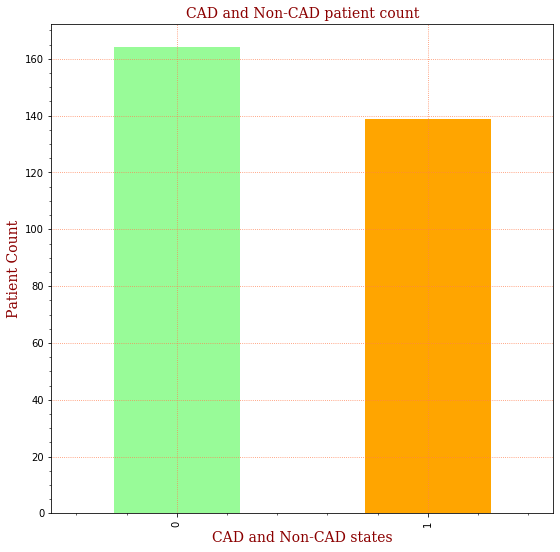

In [14]:
cleveland_df['result'].value_counts().plot(kind='bar', figsize=(9,9), color= ['palegreen','orange'])
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('CAD and Non-CAD states',fontdict=bar_font)
plt.ylabel('Patient Count',fontdict=bar_font)
plt.title('CAD and Non-CAD patient count',fontdict=bar_font)

##### **Finding the missing values**
As missing values are marked as '?'. So replacing such values with None.

In [15]:
cleveland_df = cleveland_df.applymap(lambda val : None if val == '?' else val)

In [16]:
cleveland_df

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


##### **Counting the missing values**

In [17]:
cleveland_df.isnull().sum()

age             0
gender          0
chest_pain      0
rest_bp         0
cholestrol      0
fst_bs          0
rest_ecg        0
max_hrt_rate    0
ex_angina       0
oldpeak         0
slope           0
color_vsl       4
thal            2
num             0
result          0
dtype: int64

##### **Visualize the missing records**

In [18]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

Text(0.5, 1, 'Missing values in the dataset')

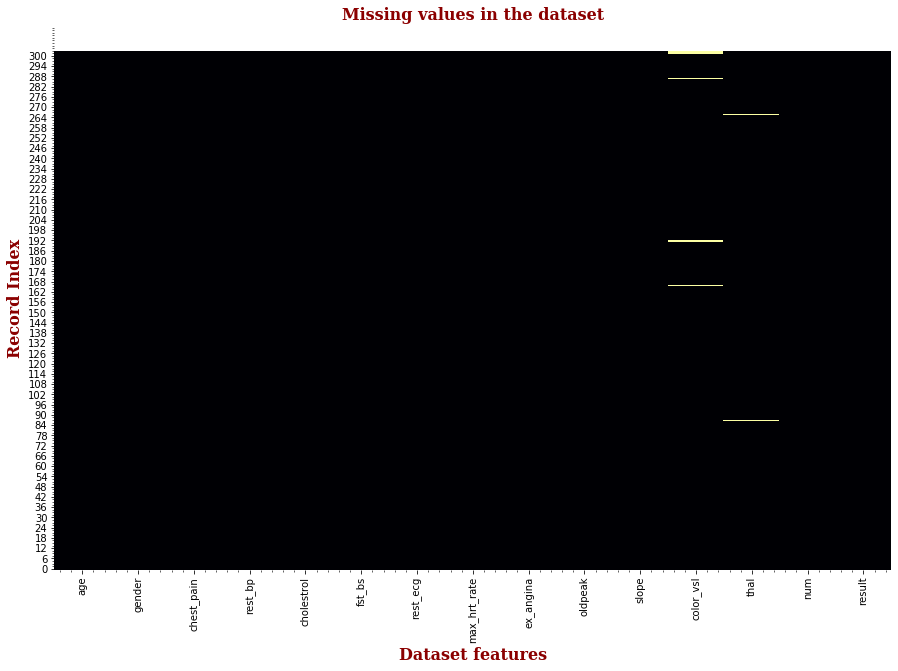

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(cleveland_df.isnull(),cbar=False,cmap='inferno')
plt.axis(ymin=0,ymax=318)
plt.minorticks_on()
plt.xlabel("Dataset features",fontdict=font)
plt.ylabel("Record Index",fontdict=font)
plt.title("Missing values in the dataset",fontdict=font)

In [20]:
# cleveland_df.dropna(axis=0,inplace=True)

In [21]:
# want_error

##### **Records with NULL Color_vsl or ca**

In [22]:
cleveland_df[cleveland_df['color_vsl'].isnull()]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,None,3.0,0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,None,7.0,1,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,None,7.0,0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,None,3.0,0,0


##### **Count the records for color_vsl categories**

In [23]:
cleveland_df['color_vsl'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: color_vsl, dtype: int64

##### **Count the CAD and Non-CAD records for every color_vsl category**

In [24]:
pd.DataFrame(cleveland_df.groupby(['color_vsl','result'])['result'].count())

result
color_vsl result        
0.0       0          130
          1           46
1.0       0           21
          1           44
2.0       0            7
          1           31
3.0       0            3
          1           17

### **Filling the missing values in COLOR_VSL feature**
##### **Replacing NULL with MAX occurence of respective feature class based on TARGET column** 

In [25]:
cleveland_df['fix_color_vsl'] = cleveland_df['color_vsl'].fillna(value='0.0')

In [26]:
cleveland_df['fix_color_vsl'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: fix_color_vsl, dtype: int64

##### **Records with NULL THAL or THALASSEMIA**

In [27]:
cleveland_df[cleveland_df['thal'].isnull()]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,None,0,0,0.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,None,2,1,0.0


##### **Count the records for thal categories**

In [28]:
cleveland_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

##### **Count the CAD and Non-CAD records for every thal category**

In [29]:
thal_missing_val = pd.DataFrame(cleveland_df.groupby(['thal','result'])['result'].count())

In [30]:
thal_missing_val.index.names = ['thal', 'result1']

In [31]:
thal_missing_val.sort_values(['thal'],ascending=True)

result
thal result1        
3.0  0           129
     1            37
6.0  0             6
     1            12
7.0  0            28
     1            89

### **Filling the missing values in THAL feature**
##### **Replacing NULL with MAX occurence of respective feature class based on TARGET column** 

In [32]:
cleveland_df[(cleveland_df['result'] == 0) & (cleveland_df['thal'].isna())]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,None,0,0,0.0


In [33]:
cleveland_df['result'].dtype

dtype('int64')

In [34]:
cleveland_df['fix_thal'] = cleveland_df[['thal','result']].apply(lambda val : '7.0' if val['result'] == 1 and val['thal'] == None else '3.0' if val['result'] == 0 and val['thal'] == None else val['thal'],axis=1)

In [35]:
cleveland_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [36]:
cleveland_df['fix_thal'].value_counts()

3.0    167
7.0    118
6.0     18
Name: fix_thal, dtype: int64

### **Visualizing missing values again**

In [37]:
cleveland_df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'color_vsl', 'thal', 'num', 'result', 'fix_color_vsl', 'fix_thal'],
      dtype='object')

In [38]:
missing_val_font = {'family':'serif',
                   'weight': 'bold',
                   'size': 14,
                   'color':'red'}

Text(0.5, 1, 'Post fix - Missing values')

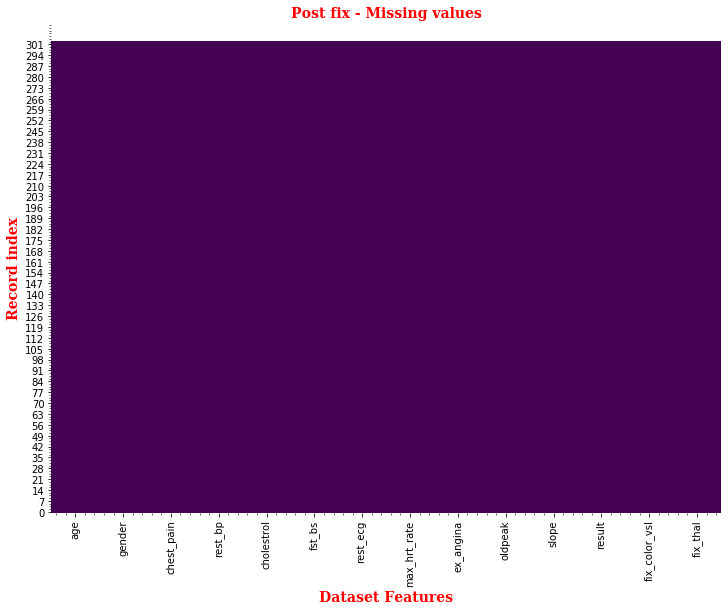

In [39]:
plt.figure(figsize=(12,9))
sns.heatmap(cleveland_df[['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope', 'result', 'fix_color_vsl', 'fix_thal']].isnull(),cbar=False,cmap='viridis')
plt.minorticks_on()
plt.axis(ymin=0,ymax=315)
plt.xlabel("Dataset Features",fontdict=missing_val_font)
plt.ylabel("Record index",fontdict=missing_val_font)
plt.title("Post fix - Missing values",fontdict=missing_val_font)

### **Datatype handling**

##### **Several columns are having definite values but are of float datatype**

In [40]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
age              303 non-null float64
gender           303 non-null float64
chest_pain       303 non-null float64
rest_bp          303 non-null float64
cholestrol       303 non-null float64
fst_bs           303 non-null float64
rest_ecg         303 non-null float64
max_hrt_rate     303 non-null float64
ex_angina        303 non-null float64
oldpeak          303 non-null float64
slope            303 non-null float64
color_vsl        299 non-null object
thal             301 non-null object
num              303 non-null int64
result           303 non-null int64
fix_color_vsl    303 non-null object
fix_thal         303 non-null object
dtypes: float64(11), int64(2), object(4)
memory usage: 35.6+ KB


In [41]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl,fix_thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.0,3.0


##### **Created a UDF for converting the datatypes of required columns**

In [42]:
def handle_datatype(df_name,unchange_col=None):
    """
    Description: This function will change the datatype of the features in the dataset.
    
    Input parameter:
    *df_name*: It will only accept the DataFrame object.
    *unchange_col*: This is the column for which you don't want to change the datatype.
    
    Return:
    It will returned the modified DataFrame object.
    """
    cols = ['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
            'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak','slope', 'result', 'fix_color_vsl', 'fix_thal']
    for col in cols:
        if col != unchange_col:
            df_name[col] = df_name[col].astype('float')
            df_name[col] = df_name[col].astype('int')
    return df_name

In [43]:
handle_datatype(cleveland_df,'oldpeak')

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1,1,3


### **Drop the non-required column**

In [44]:
cleveland_df.drop(['color_vsl','thal','num'],axis=1,inplace=True)

In [45]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,3


In [46]:
cleveland_df.shape

(303, 14)

In [47]:
cleveland_df.isnull().sum()

age              0
gender           0
chest_pain       0
rest_bp          0
cholestrol       0
fst_bs           0
rest_ecg         0
max_hrt_rate     0
ex_angina        0
oldpeak          0
slope            0
result           0
fix_color_vsl    0
fix_thal         0
dtype: int64

In [48]:
cleveland_df.dtypes

age                int32
gender             int32
chest_pain         int32
rest_bp            int32
cholestrol         int32
fst_bs             int32
rest_ecg           int32
max_hrt_rate       int32
ex_angina          int32
oldpeak          float64
slope              int32
result             int32
fix_color_vsl      int32
fix_thal           int32
dtype: object

# **Exploratory Data Analysis**

In [49]:
cleveland_df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [50]:
# import numpy as np

In [51]:
# np.sqrt(((np.square(cleveland_df['age']-54.5))/302).sum()) # SQRT((x-mean)2/N-1)

In [52]:
# cleveland_df[cleveland_df['age'] >= float(48)]['age'].count()/303

In [53]:
# cleveland_df[cleveland_df['age'] >= float(56)]['age'].count()/303

In [54]:
# cleveland_df[cleveland_df['age'] >= float(61)]['age'].count()/303

In [55]:
cleveland_df['result'].unique()

array([0, 1], dtype=int64)

## **Question-1: How many people of age group 29-48 have blockage greater than 50%?**

In [56]:
age_grp_29_48 = pd.concat([cleveland_df[(cleveland_df['age'] >= 29.0) & (cleveland_df['age'] < 48.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

In [57]:
age_grp_29_48.reset_index(inplace=True)

In [58]:
age_grp_29_48.columns = ['result','age','color']

In [59]:
age_grp_29_48

,result,age,color
0,0,54,palegreen
1,1,21,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 29 - 48')

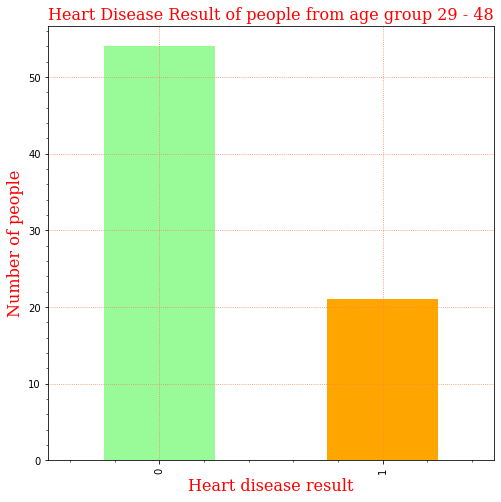

In [60]:
label_style={'family':'serif','color':'red','size':16}
age_grp_29_48.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_29_48['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 29 - 48',fontdict=label_style)

## **Question-2: How many people of age group 48-56 have blockage greater than 50%?**

In [61]:
age_grp_48_56 = pd.concat([cleveland_df[(cleveland_df['age'] >= 48.0) & (cleveland_df['age'] < 56.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

age_grp_48_56.reset_index(inplace=True)

age_grp_48_56.columns = ['result','age','color']

age_grp_48_56

,result,age,color
0,0,48,palegreen
1,1,28,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 48 - 56')

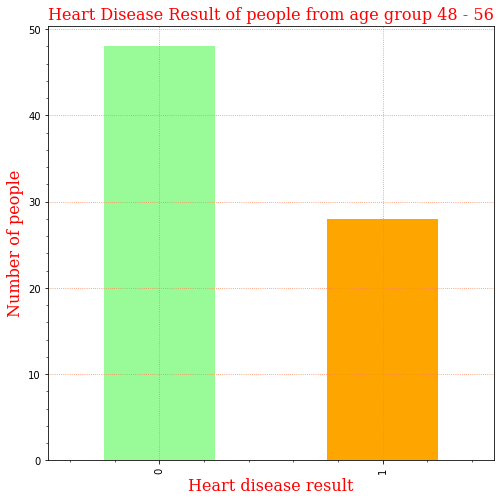

In [62]:
label_style={'family':'serif','color':'red','size':16}
age_grp_48_56.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_48_56['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 48 - 56',fontdict=label_style)

## **Question-3: How many people of age group 56-77 have blockage greater than 50%?**

In [63]:
age_grp_56_77 = pd.concat([cleveland_df[(cleveland_df['age'] >= 56.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

age_grp_56_77.reset_index(inplace=True)

age_grp_56_77.columns = ['result','age','color']

age_grp_56_77

,result,age,color
0,0,62,palegreen
1,1,90,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 56 - 77')

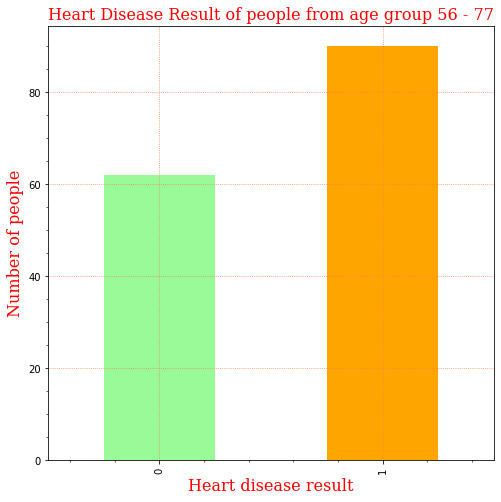

In [64]:
label_style={'family':'serif','color':'red','size':16}
age_grp_56_77.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_56_77['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 56 - 77',fontdict=label_style)

## **Question-4: How many MALE and FEMALE have heart disease?**

In [65]:
pd.concat([pd.DataFrame(cleveland_df['gender'].value_counts()),pd.DataFrame({'gender_name':['female','male']})],axis=1)

,gender,gender_name
0,97,female
1,206,male


In [66]:
gender_dist = pd.DataFrame(cleveland_df.groupby(by=['gender','result'],axis=0)['age'].count())

gender_dist.columns = ['Count of people']
gender_dist.index.names = ['Gender(0:Female,1:Male)','Heart Disease Result']

In [67]:
gender_dist

Count of people
Gender(0:Female,1:Male) Heart Disease Result                 
0                       0                                  72
                        1                                  25
1                       0                                  92
                        1                                 114

## **Question-5: How many patients suffered from various CHEST PAINS?**

In [68]:
chest_pain_dist = pd.DataFrame(cleveland_df.groupby(by=['gender','result','chest_pain'],axis=0)['age'].count())

In [69]:
chest_pain_dist.columns = ['Patient Count']
chest_pain_dist.index.names = ['Gender(0:Female,1:Male)','Heart Disease Result','Chest Pain Type']

In [70]:
chest_pain_dist

Patient Count
Gender(0:Female,1:Male) Heart Disease Result Chest Pain Type               
0                       0                    1                            4
                                             2                           16
                                             3                           34
                                             4                           18
                        1                    2                            2
                                             3                            1
                                             4                           22
1                       0                    1                           12
                                             2                           25
                                             3                           34
                                             4                           21
                        1                    1                            7
                                             2                            7
                                             3                           17
                                             4                           83

## **Question-6: Does high blood pressure at rest corresponds to a CAD?**

In [71]:
cleveland_df['rest_bp'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_bp, dtype: float64

### **BP Group1: (94-120]**

In [72]:
rest_bp_94_120 = pd.DataFrame(cleveland_df[(cleveland_df['rest_bp'] >= 94.0) & (cleveland_df['rest_bp'] < 120.0)]['result'].value_counts())
rest_bp_94_120.reset_index(inplace=True)
rest_bp_94_120.columns = ['CAD Result','Patient_Count']
rest_bp_94_120['color'] = rest_bp_94_120['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [73]:
rest_bp_94_120

,CAD Result,Patient_Count,color
0,0,37,palegreen
1,1,23,orange


Text(0.5, 1.0, 'CAD Result of people having BP from group 94 - 120')

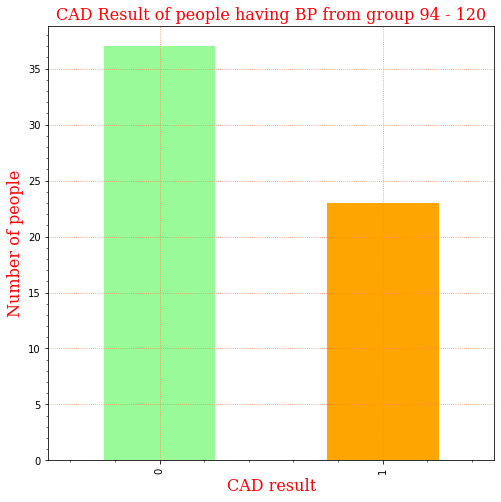

In [74]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_94_120.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_94_120['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 94 - 120',fontdict=label_style)

### **BP Group2: (120-130]**

In [75]:
rest_bp_120_130 = pd.DataFrame(cleveland_df[(cleveland_df['rest_bp'] >= 120.0) & (cleveland_df['rest_bp'] < 130.0)]['result'].value_counts())
rest_bp_120_130.reset_index(inplace=True)
rest_bp_120_130.columns = ['CAD Result','Patient_Count']
rest_bp_120_130['color'] = rest_bp_120_130['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [76]:
rest_bp_120_130

,CAD Result,Patient_Count,color
0,0,40,palegreen
1,1,35,orange


Text(0.5, 1.0, 'CAD Result of people having BP from group 120 - 130')

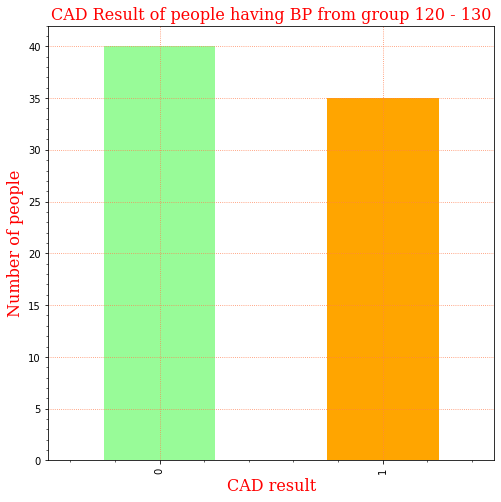

In [77]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_120_130.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_120_130['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 120 - 130',fontdict=label_style)

### **BP Group3: (130-140]**

In [78]:
rest_bp_130_140 = pd.DataFrame(cleveland_df[(cleveland_df['rest_bp'] >= 130.0) & (cleveland_df['rest_bp'] < 140.0)]['result'].value_counts())
rest_bp_130_140.reset_index(inplace=True)
rest_bp_130_140.columns = ['CAD Result','Patient_Count']
rest_bp_130_140['color'] = rest_bp_130_140['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [79]:
rest_bp_130_140

,CAD Result,Patient_Count,color
0,0,43,palegreen
1,1,27,orange


Text(0.5, 1.0, 'CAD Result of people having BP from group 130 - 140')

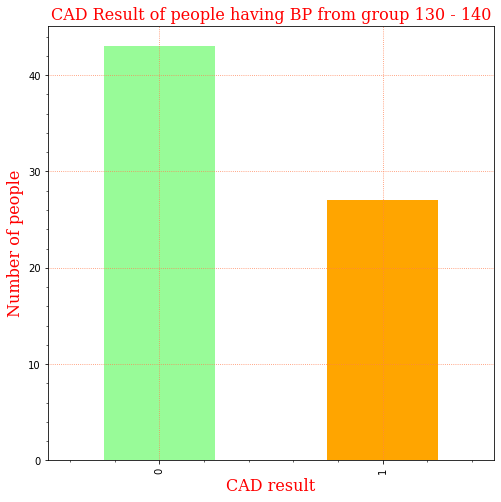

In [80]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_130_140.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_130_140['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 130 - 140',fontdict=label_style)

### **BP Group4: 140 or more**

In [81]:
rest_bp_140_more = pd.DataFrame(cleveland_df[(cleveland_df['rest_bp'] >= 140.0)]['result'].value_counts())
rest_bp_140_more.reset_index(inplace=True)
rest_bp_140_more.columns = ['CAD Result','Patient_Count']
rest_bp_140_more['color'] = rest_bp_140_more['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [82]:
rest_bp_140_more

,CAD Result,Patient_Count,color
0,1,54,orange
1,0,44,palegreen


Text(0.5, 1.0, 'CAD Result of people having BP from group 140 or more')

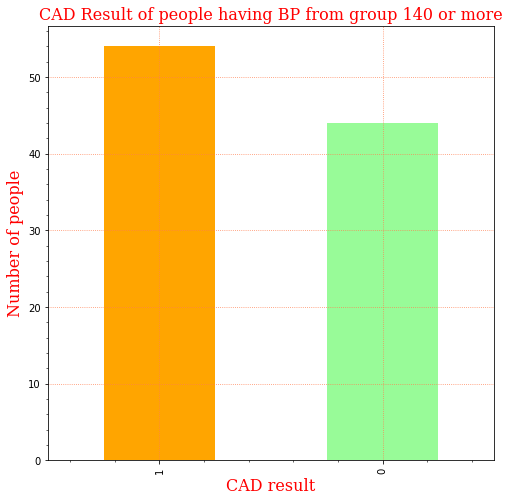

In [83]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_140_more.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_140_more['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 140 or more',fontdict=label_style)

## **Question-7: Does high blood pressure corresponds to high serum cholestrol, also leads to CAD?**

In [84]:
cleveland_df['cholestrol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: cholestrol, dtype: float64

Text(0.5, 1.0, 'CAD Result')

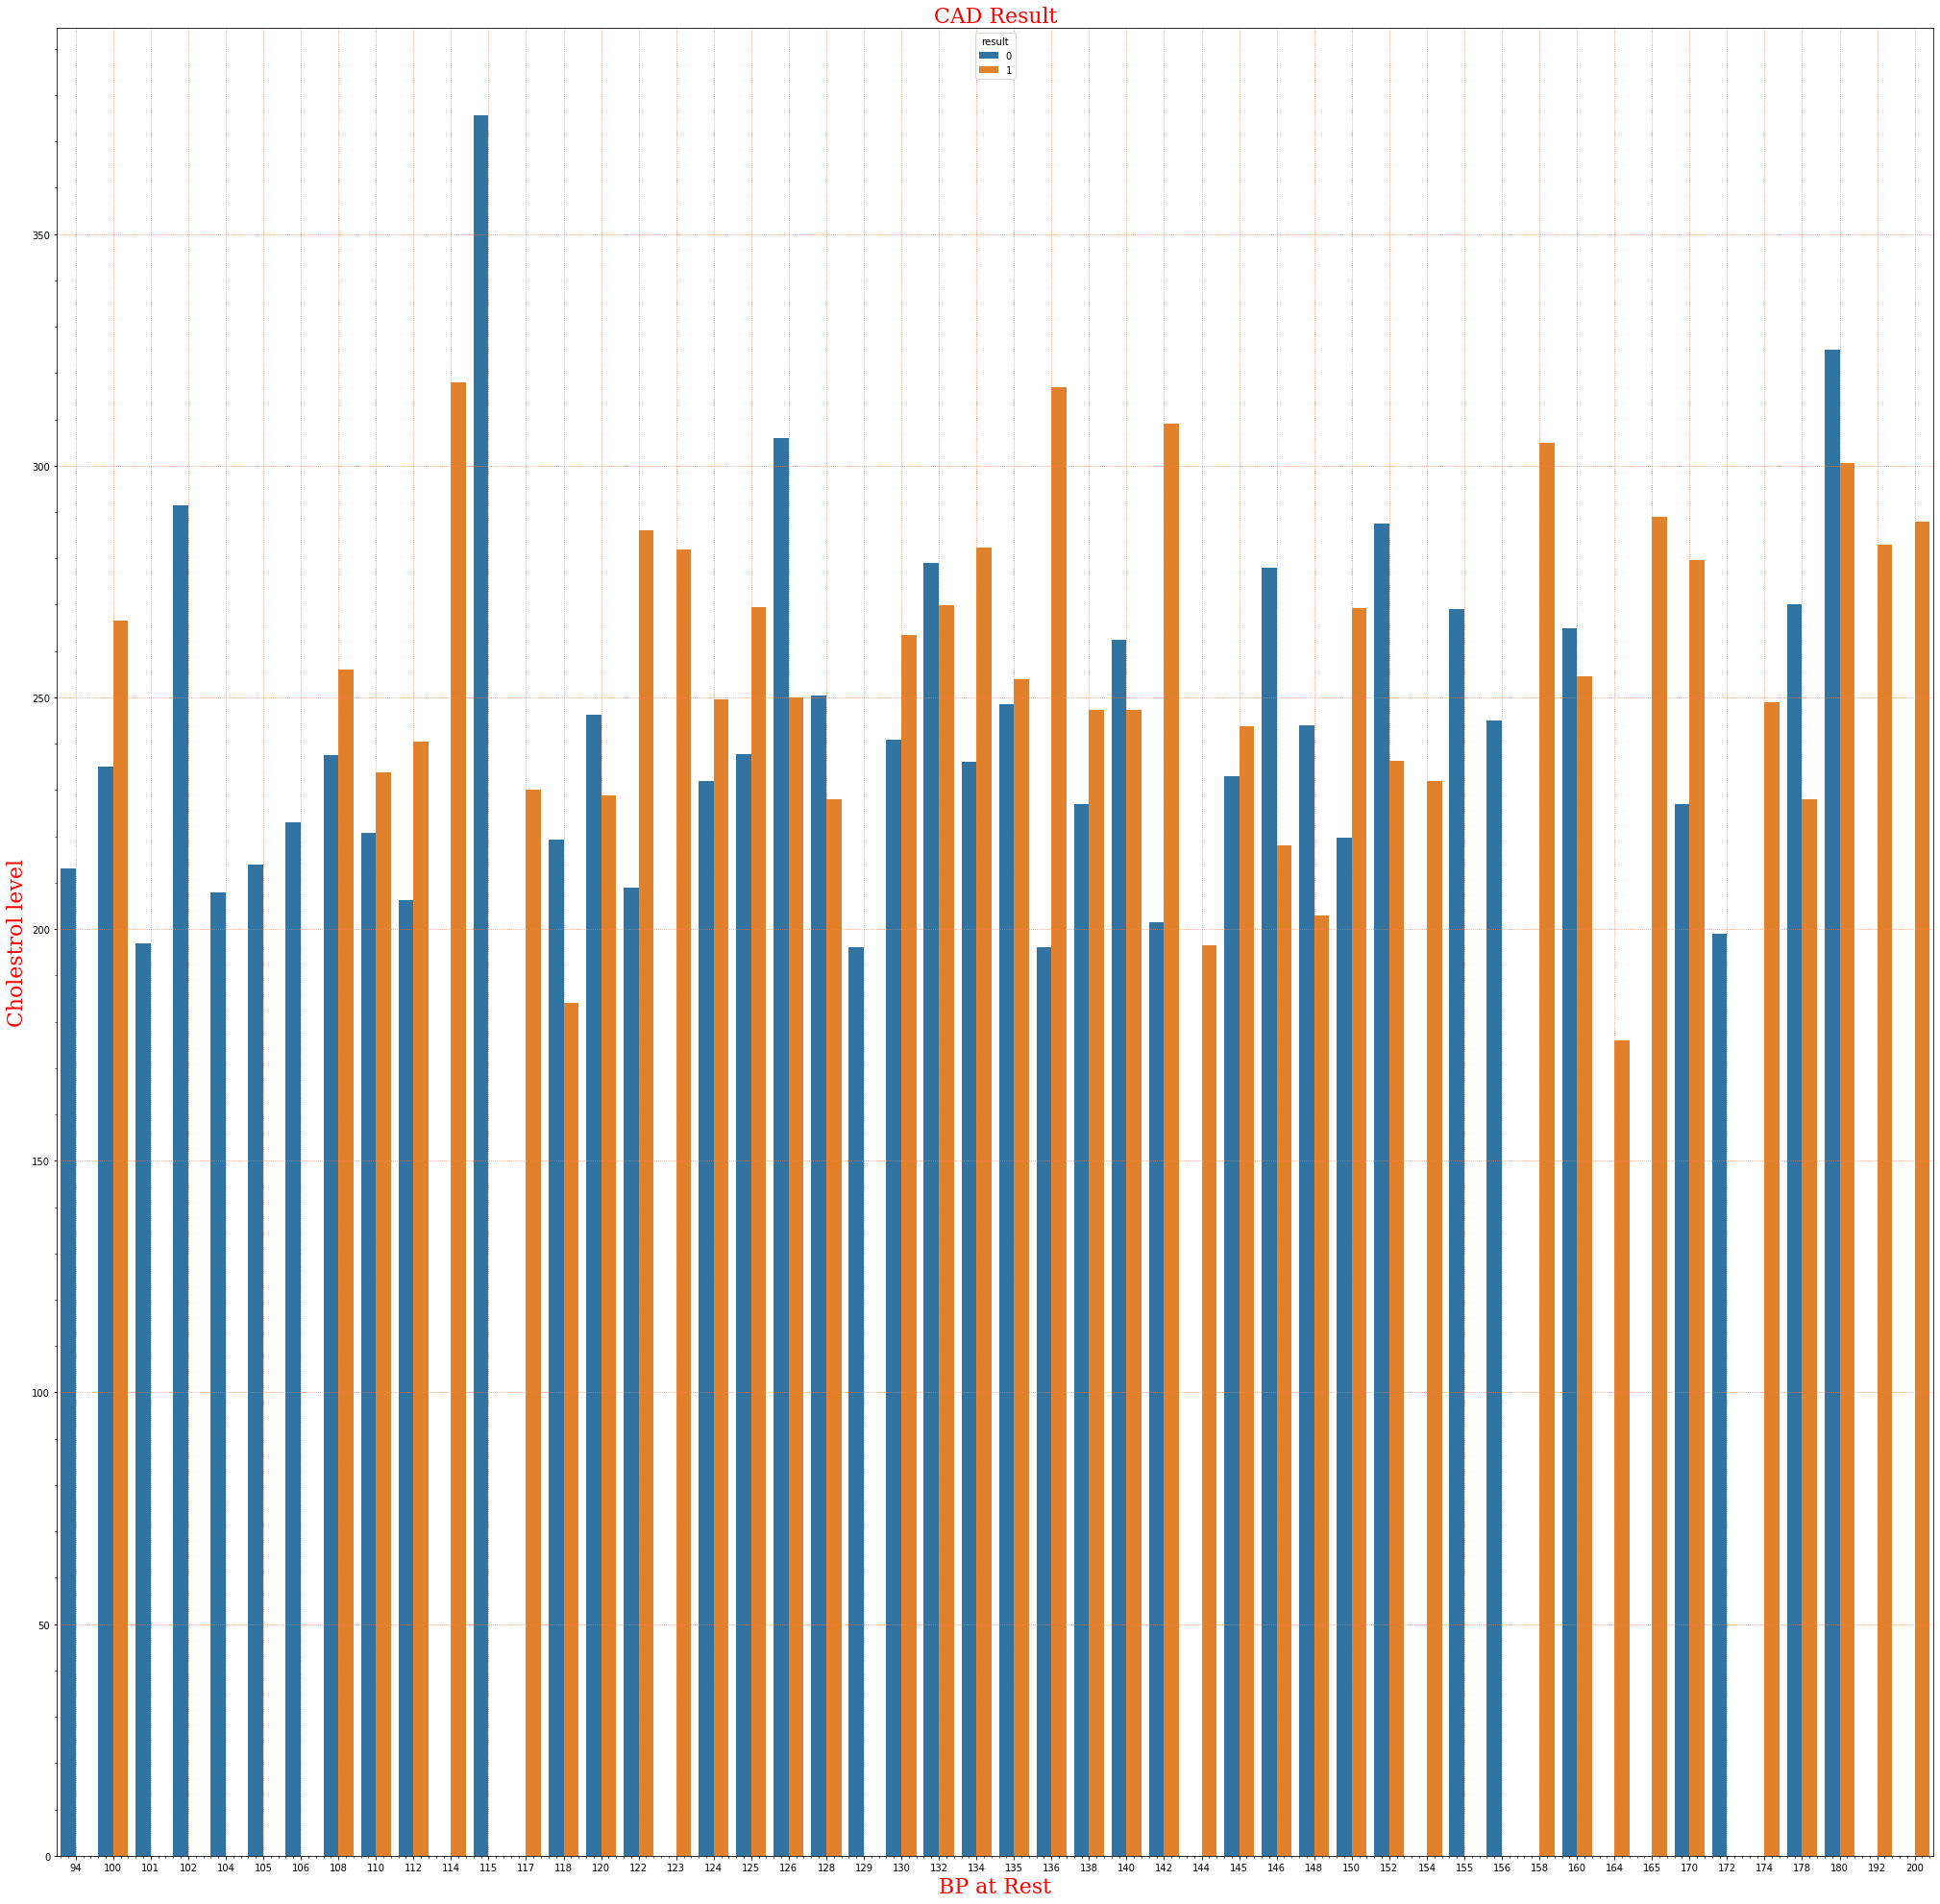

In [85]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(35,35))
sns.barplot(x=cleveland_df['rest_bp'],y=cleveland_df['cholestrol'],hue=cleveland_df['result'],ci=None,dodge=True)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('CAD Result',fontdict=label_style)

## **Question-8: Does high blood pressure corresponds to high serum cholestrol, also leads to high blood sugar?**

Text(0.5, 1.0, 'Blood Sugar Result')

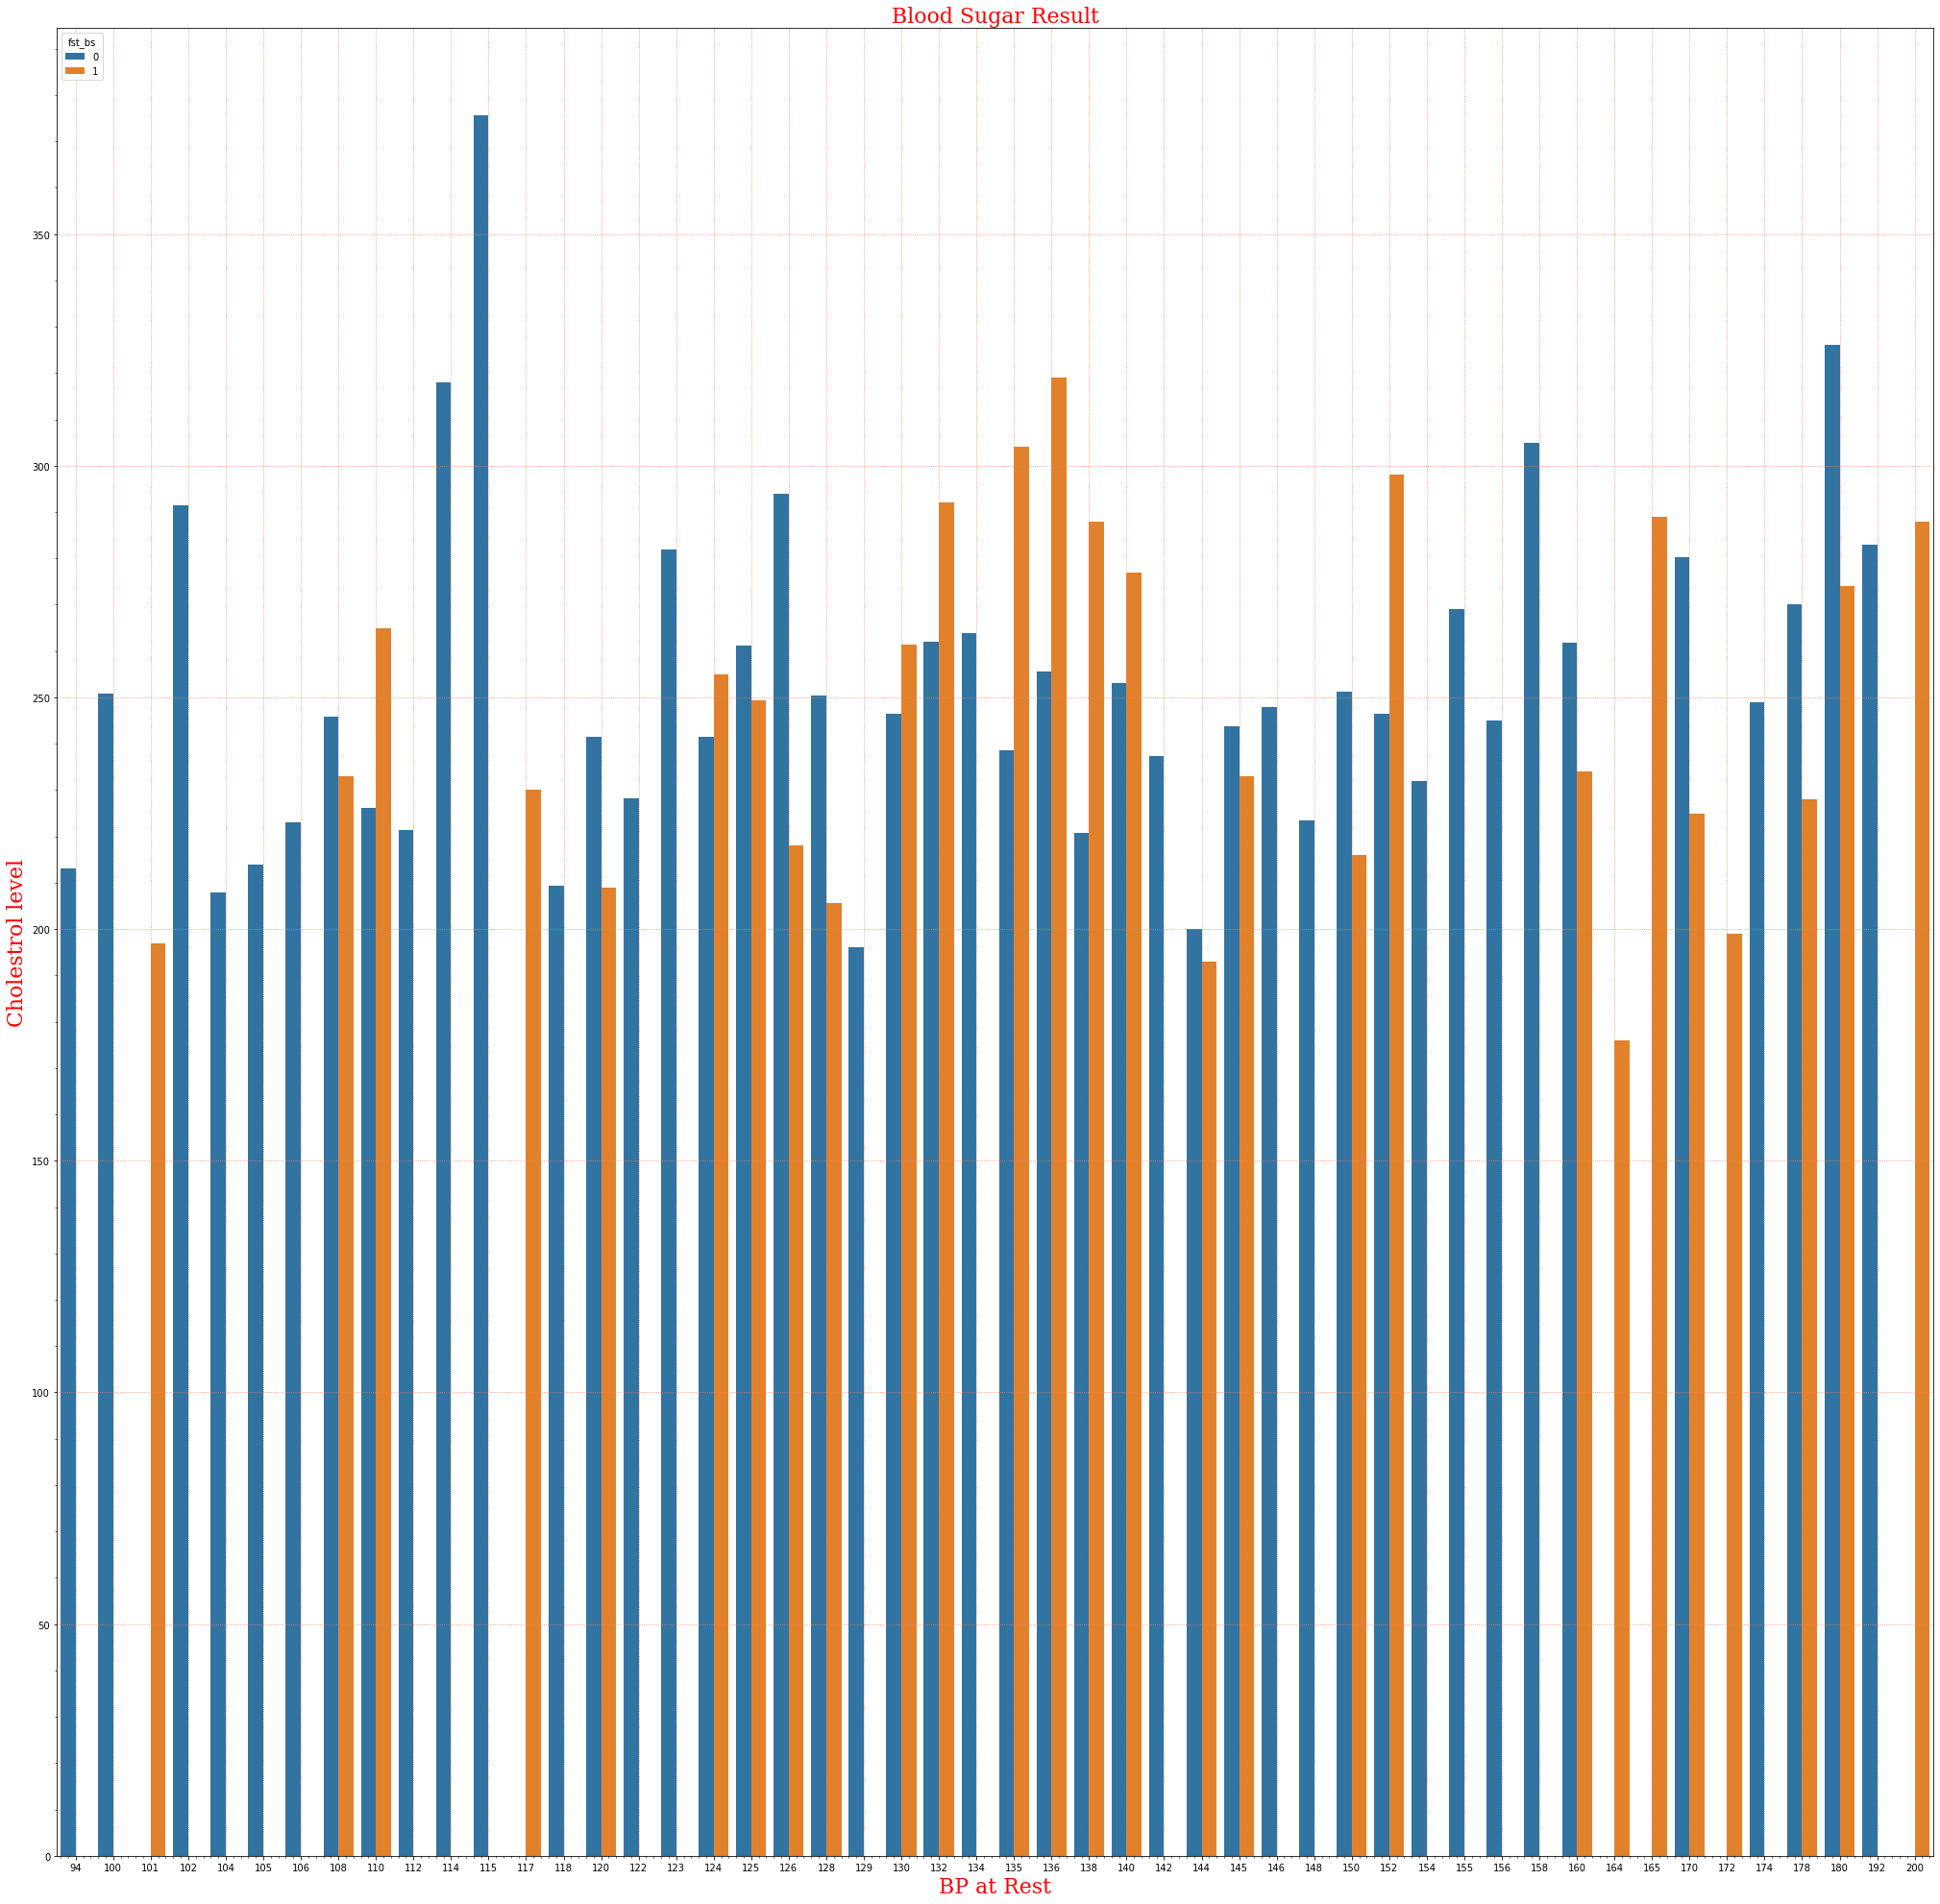

In [86]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(35,35))
sns.barplot(x=cleveland_df['rest_bp'],y=cleveland_df['cholestrol'],hue=cleveland_df['fst_bs'],ci=None,dodge=True)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('Blood Sugar Result',fontdict=label_style)

## **Question-9: Does high blood pressure corresponds to high blood sugar, also leads to CAD?**

In [87]:
pd.DataFrame(cleveland_df[cleveland_df['rest_bp'] >=160]['fst_bs'].value_counts())

,fst_bs
0,18
1,8


In [88]:
sugar_high_bp_relation = pd.DataFrame(cleveland_df[cleveland_df['rest_bp'] >=160].groupby(['fst_bs','result'])['age'].count())
sugar_high_bp_relation.columns = ['People count']
sugar_high_bp_relation.index.names = ['Blood Sugar(0:Low,1:High)','CAD Result']
sugar_high_bp_relation

People count
Blood Sugar(0:Low,1:High) CAD Result              
0                         0                      7
                          1                     11
1                         0                      2
                          1                      6

## **Question-10: Does ST Wave Abnormality corresponds leads to CAD?**

In [89]:
pd.DataFrame(cleveland_df.groupby('rest_ecg')['result'].count())

,result
rest_ecg,
0,151
1,4
2,148


In [90]:
rest_ecg_CAD_relation = pd.DataFrame(cleveland_df.groupby(['rest_ecg','result'])['age'].count())
rest_ecg_CAD_relation.columns = ['People Count']
rest_ecg_CAD_relation.index.names = ['Rest ECG(0:Normal, 1:ST Wave Abnormal, 2:Left Vent Hypertrophy)','CAD Result']
rest_ecg_CAD_relation

People Count
Rest ECG(0:Normal, 1:ST Wave Abnormal, 2:Left V... CAD Result              
0                                                  0                     95
                                                   1                     56
1                                                  0                      1
                                                   1                      3
2                                                  0                     68
                                                   1                     80

In [91]:
rest_ecg_CAD_relation.reset_index(inplace=True)

In [92]:
rest_ecg_CAD_relation.columns = ['Rest_ECG','CAD_Result','People_Count']

Text(0.5, 1.0, 'Rest ECG & CAD relation')

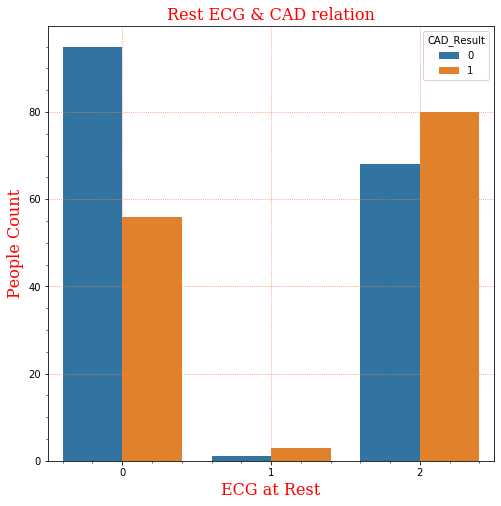

In [93]:
label_style={'family':'serif','color':'red','size':16}
plt.figure(figsize=(8,8))
sns.barplot(x=rest_ecg_CAD_relation['Rest_ECG'],y=rest_ecg_CAD_relation['People_Count'],hue=rest_ecg_CAD_relation['CAD_Result'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('ECG at Rest',fontdict=label_style)
plt.ylabel('People Count',fontdict=label_style)
plt.title('Rest ECG & CAD relation',fontdict=label_style)

## **Question-11: Does LEFT VENTRICULAR HYPERTROPHY has a realtion with Blood Pressure and Cholestrol?**

In [94]:
cleveland_df[cleveland_df['rest_ecg'] == 2][['rest_bp','cholestrol']].describe()

,rest_bp,cholestrol
count,148.000000,148.000000
mean,134.189189,255.479730
std,18.099630,54.698365
min,100.000000,149.000000
25%,121.500000,220.500000
50%,130.000000,253.000000
75%,142.000000,283.000000
max,200.000000,564.000000


In [95]:
left_vent_ht_bp_chol_relation = cleveland_df[cleveland_df['rest_ecg'] == 2][['rest_bp','cholestrol','result']]

Text(0.5, 1.0, 'Rest BP & Cholestrol relation for Left Ventricular Hypertrophy')

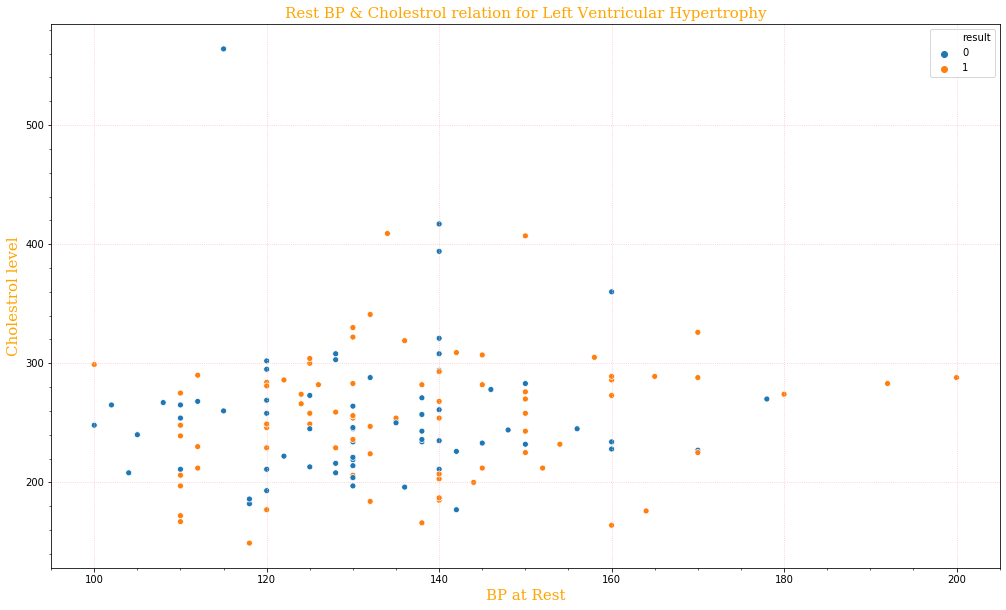

In [96]:
label_style={'family':'serif','color':'orange','size':15}
plt.figure(figsize=(17,10))
sns.scatterplot(x=left_vent_ht_bp_chol_relation['rest_bp'],y=left_vent_ht_bp_chol_relation['cholestrol'],hue=left_vent_ht_bp_chol_relation['result'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('Rest BP & Cholestrol relation for Left Ventricular Hypertrophy',fontdict=label_style)

## **Question-12: Does LEFT VENTRICULAR HYPERTROPHY associated with High Blood Sugar, also leads to CAD?**

In [97]:
left_vent_hyt_bs_cad = cleveland_df[cleveland_df['rest_ecg'] == 2][['age','fst_bs','result']].groupby(by=['fst_bs','result']).count()
left_vent_hyt_bs_cad.index.names = ['Blood Sugar','CAD Result']
left_vent_hyt_bs_cad.columns = ['People count']

In [98]:
left_vent_hyt_bs_cad

People count
Blood Sugar CAD Result              
0           0                     57
            1                     65
1           0                     11
            1                     15

## **Question-13: Does MAX Heart Rate corresponds to BP at Rest, also leads to CAD?**

In [99]:
cleveland_df['max_hrt_rate'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_hrt_rate, dtype: float64

Text(0.5, 1.0, 'Rest BP & Max Heart Rate relation')

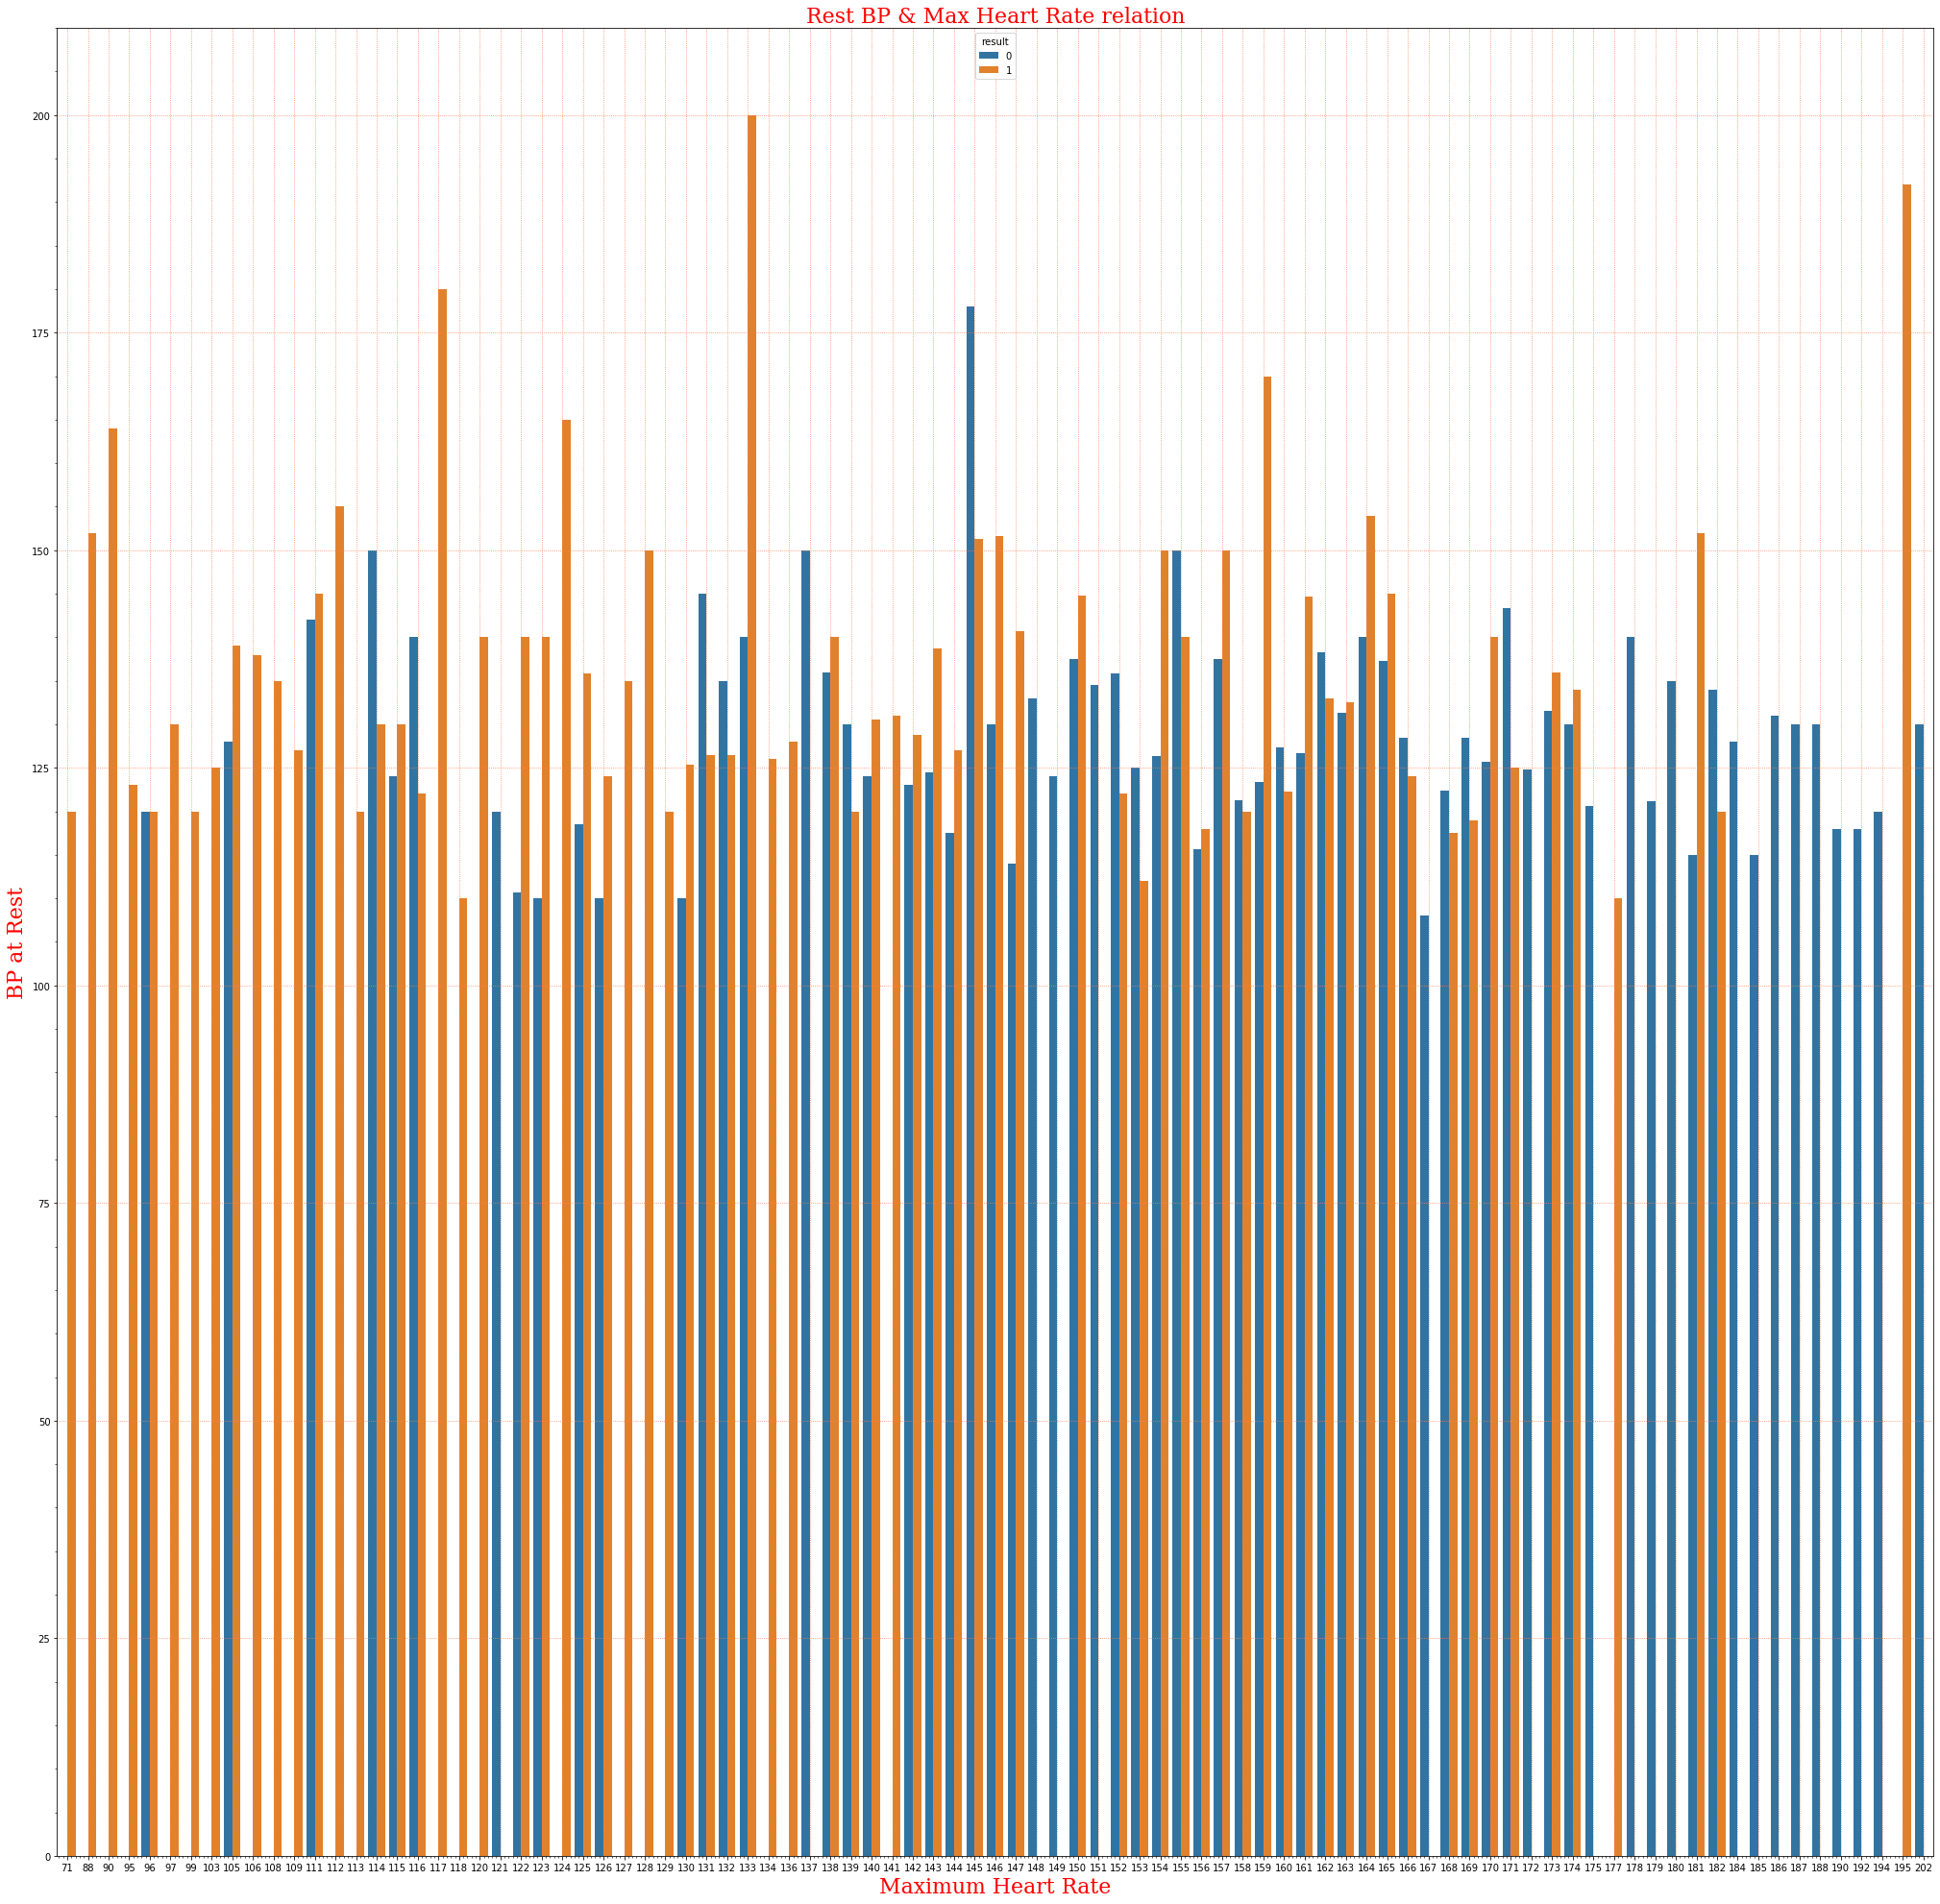

In [100]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(35,35))
sns.barplot(x=cleveland_df['max_hrt_rate'],y=cleveland_df['rest_bp'],hue=cleveland_df['result'],ci=None)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Maximum Heart Rate',fontdict=label_style)
plt.ylabel('BP at Rest',fontdict=label_style)
plt.title('Rest BP & Max Heart Rate relation',fontdict=label_style)

## **Question-14: Does Exercise induced angina corresponds to CAD?**

In [101]:
pd.DataFrame(cleveland_df['ex_angina'].value_counts())

,ex_angina
0,204
1,99


In [102]:
exc_angina_cad = pd.DataFrame(cleveland_df.groupby(by=['ex_angina','result'],axis=0)['age'].count())
exc_angina_cad.index.names = ['Exc Angina(1:Yes, 0:No)', 'CAD Result']
exc_angina_cad.columns = ['People Count']
exc_angina_cad

People Count
Exc Angina(1:Yes, 0:No) CAD Result              
0                       0                    141
                        1                     63
1                       0                     23
                        1                     76

## **Question-15: How exercise induced angina and oldpeak corresponds to the CAD result?**

In [103]:
exangina_oldpk = cleveland_df[cleveland_df['ex_angina'] == 1][['rest_bp','oldpeak','result']]

Text(0.5, 1.0, 'Rest BP & Old peak where patient felt exercise induced angina')

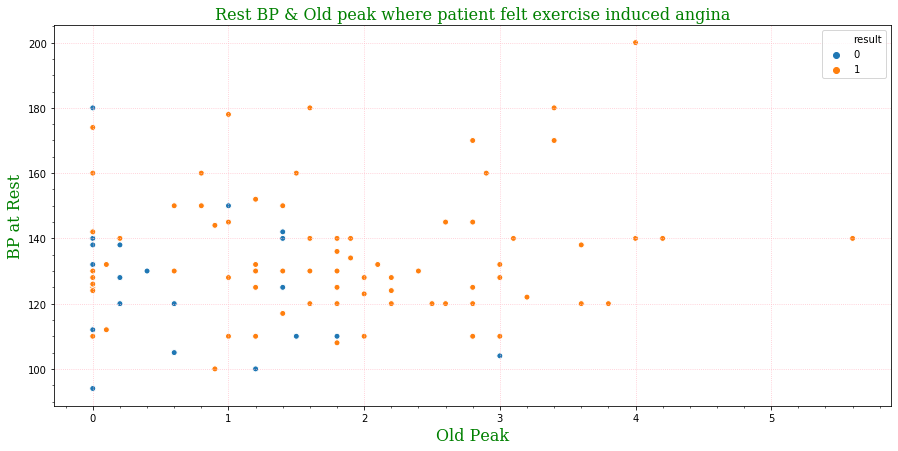

In [104]:
label_style={'family':'serif','color':'Green','size':16}
plt.figure(figsize=(15,7))
sns.scatterplot(x=exangina_oldpk['oldpeak'],y=exangina_oldpk['rest_bp'],hue=exangina_oldpk['result'],linewidth=1)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Old Peak',fontdict=label_style)
plt.ylabel('BP at Rest',fontdict=label_style)
plt.title('Rest BP & Old peak where patient felt exercise induced angina',fontdict=label_style)

## **Question-16: What kind of ST slope in exercise test corresponds more to CAD?**

In [105]:
pd.DataFrame(cleveland_df['slope'].value_counts())

,slope
1,142
2,140
3,21


In [106]:
pd.DataFrame(cleveland_df.groupby(['slope','result'])['age'].count())

age
slope result     
1     0       106
      1        36
2     0        49
      1        91
3     0         9
      1        12

## **Question-17: Does ST slope has a relationship with Oldpeak and Max heart rate?**

In [107]:
cleveland_df[['rest_bp','oldpeak','slope']].head()

,rest_bp,oldpeak,slope
0,145,2.3,3
1,160,1.5,2
2,120,2.6,2
3,130,3.5,3
4,130,1.4,1


In [108]:
cleveland_df['slope'].unique()

array([3, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Maximum heart rate & Old peak for different ST slopes')

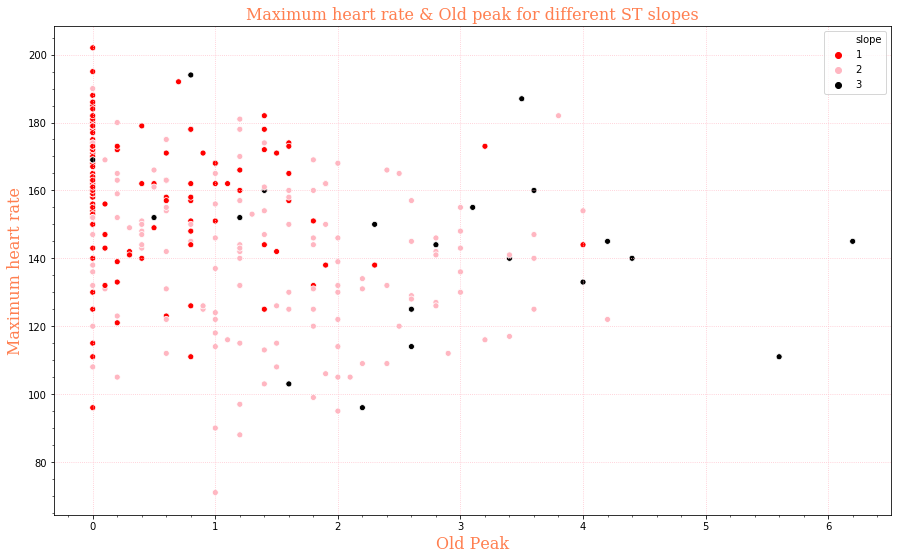

In [109]:
label_style={'family':'serif','color':'coral','size':16}
plt.figure(figsize=(15,9))
sns.scatterplot(x=cleveland_df['oldpeak'],y=cleveland_df['max_hrt_rate'],hue=cleveland_df['slope'],palette=['red','lightpink','black'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Old Peak',fontdict=label_style)
plt.ylabel('Maximum heart rate',fontdict=label_style)
plt.title('Maximum heart rate & Old peak for different ST slopes',fontdict=label_style)

## **Question-18: How Color Vessels in Flouroscopy and Exercise induced angina corresponds to CAD?**

In [110]:
pd.DataFrame(cleveland_df['fix_color_vsl'].value_counts())

,fix_color_vsl
0,180
1,65
2,38
3,20


In [111]:
pd.DataFrame(cleveland_df.groupby(['fix_color_vsl','result'])['age'].count())

age
fix_color_vsl result     
0             0       133
              1        47
1             0        21
              1        44
2             0         7
              1        31
3             0         3
              1        17

In [112]:
pd.DataFrame(cleveland_df.groupby(['fix_color_vsl','ex_angina','result'])['age'].count())

age
fix_color_vsl ex_angina result     
0             0         0       115
                        1        20
              1         0        18
                        1        27
1             0         0        16
                        1        19
              1         0         5
                        1        25
2             0         0         7
                        1        14
              1         1        17
3             0         0         3
                        1        10
              1         1         7

## **Question-19: How Thalassemia corrsponds to CAD?**

In [113]:
pd.DataFrame(cleveland_df['fix_thal'].value_counts())

,fix_thal
3,167
7,118
6,18


In [114]:
pd.DataFrame(cleveland_df.groupby(['fix_thal','result'])['age'].count())

age
fix_thal result     
3        0       130
         1        37
6        0         6
         1        12
7        0        28
         1        90

## **Question-20: Does Thalassemia has any relationship with Age or Max Heart rate/BP/Cholestrol?**

Text(0.5, 1.0, 'Maximum heart rate & Age for different effects of Thalassemia')

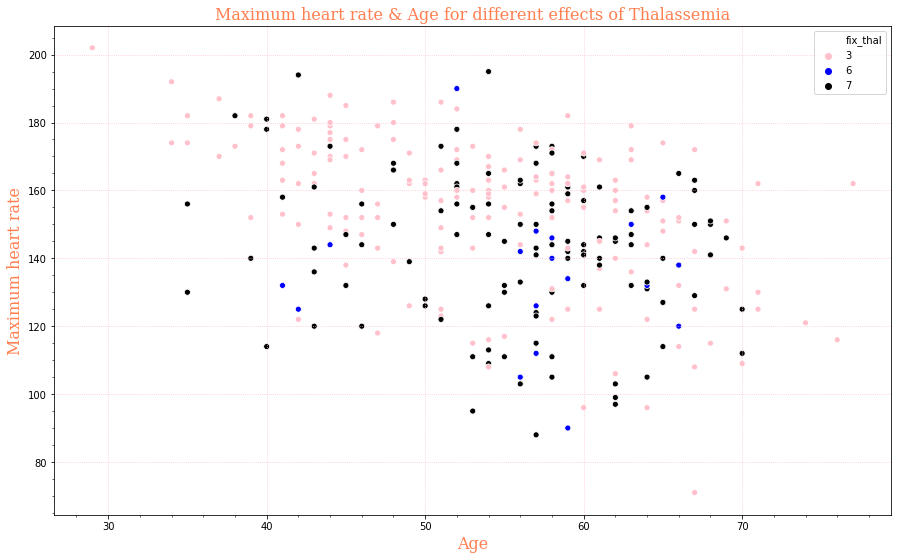

In [115]:
label_style={'family':'serif','color':'coral','size':16}
plt.figure(figsize=(15,9))
sns.scatterplot(x=cleveland_df['age'],y=cleveland_df['max_hrt_rate'],hue=cleveland_df['fix_thal'],palette=['pink','blue','black'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Age',fontdict=label_style)
plt.ylabel('Maximum heart rate',fontdict=label_style)
plt.title('Maximum heart rate & Age for different effects of Thalassemia',fontdict=label_style)

# **Handling categorical variables**

In [116]:
cleveland_df.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,1,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,1,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,3


#### **Function to perform get_dummies operation on Categorical -- Nomial/Ordinal variables**

In [117]:
def create_dummies(df_name,cols_list):
    """
    Description: This function will create a binary categorical columns from Nominal or Ordinal features.
    
    Input parameter: It will accept two parameter:
        1. df_name: The DataFrame object
        2. cols_list: The columns list which needs to be transformed
        
    Return:
    The updated DataFrame object.
    """
    for col in cols_list:
        df_name = pd.concat([pd.get_dummies(df_name[col],prefix=col),df_name],axis=1)
    return df_name

In [118]:
cleveland_df = create_dummies(cleveland_df,['gender','fst_bs','ex_angina'])

In [119]:
cleveland_df = create_dummies(cleveland_df,['chest_pain','rest_ecg','slope','fix_color_vsl','fix_thal'])

In [120]:
cleveland_df.shape

(303, 37)

In [121]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal'],
      dtype='object')

#### **Drop the unrequired columns**

In [122]:
# cleveland_df.drop(['fix_color_vsl','fix_thal','slope','rest_ecg','chest_pain'],axis=1,inplace=True)

In [123]:
cleveland_df.head()

,fix_thal_3,fix_thal_6,fix_thal_7,fix_color_vsl_0,fix_color_vsl_1,fix_color_vsl_2,fix_color_vsl_3,slope_1,slope_2,slope_3,...,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,0,1,0,1,0,0,0,0,0,1,...,233,1,2,150,0,2.3,3,0,0,6
1,1,0,0,0,0,0,1,0,1,0,...,286,0,2,108,1,1.5,2,1,3,3
2,0,0,1,0,0,1,0,0,1,0,...,229,0,2,129,1,2.6,2,1,2,7
3,1,0,0,1,0,0,0,0,0,1,...,250,0,0,187,0,3.5,3,0,0,3
4,1,0,0,1,0,0,0,1,0,0,...,204,0,2,172,0,1.4,1,0,0,3


In [124]:
cleveland_df.shape

(303, 37)

## **Handling Quantitative Variable**

## **Feature: REST_BP**

Text(0.5, 1.0, 'Distribution plot of Blood pressure in resting')

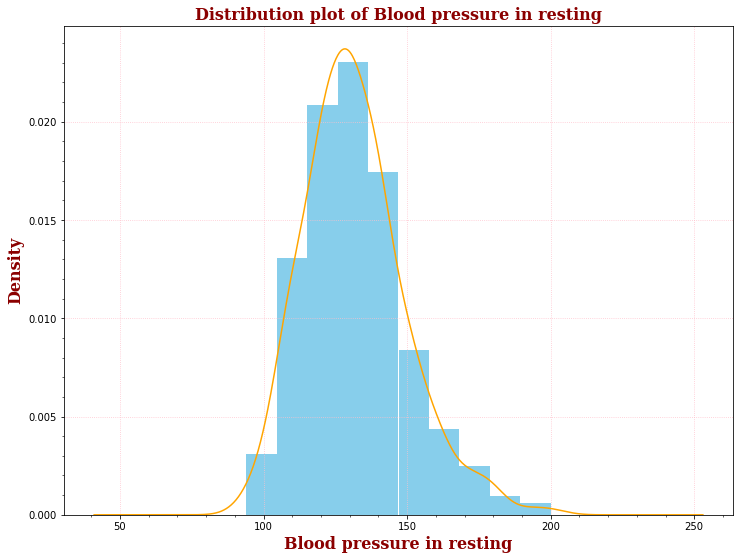

In [125]:
cleveland_df['rest_bp'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['rest_bp'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Blood pressure in resting',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Blood pressure in resting',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Rest BP')

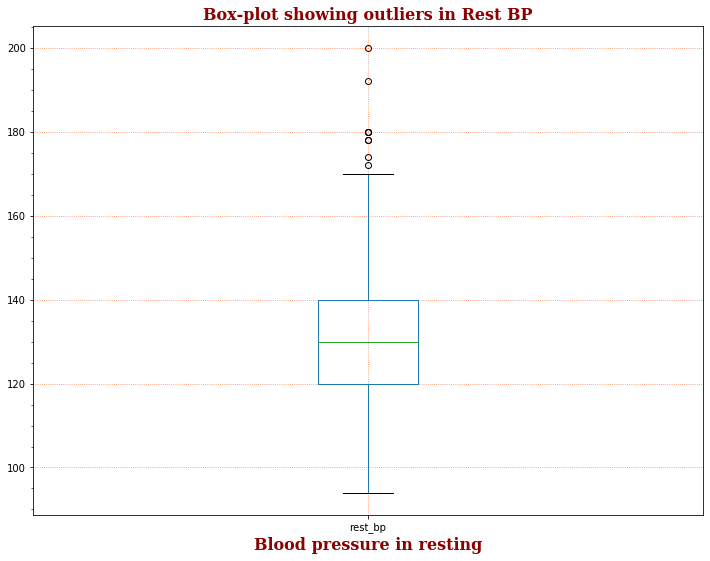

In [126]:
cleveland_df['rest_bp'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Blood pressure in resting',fontdict=font)
plt.title('Box-plot showing outliers in Rest BP',fontdict=font)

### **Scaling**

In [127]:
cleveland_df['scaled_rest_bp'] = (cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()

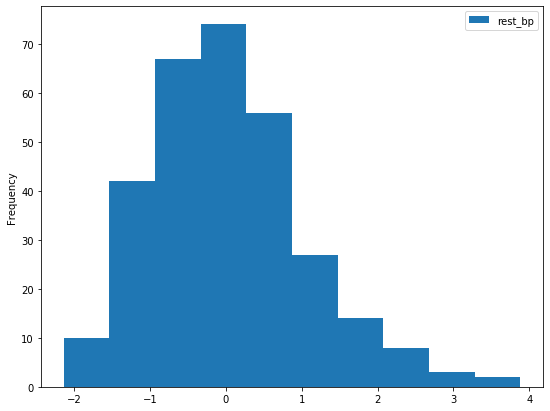

In [128]:
pd.DataFrame((cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()).plot(kind='hist',figsize=(9,7))

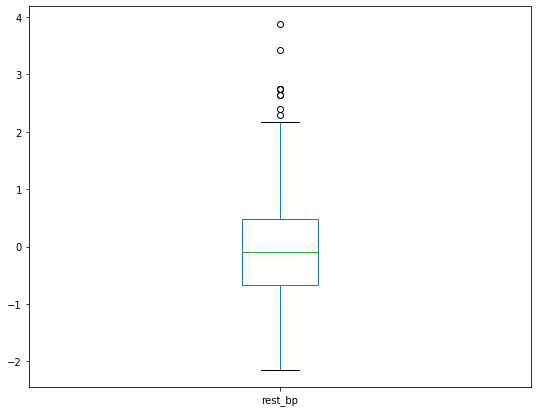

In [129]:
pd.DataFrame((cleveland_df['rest_bp'] - cleveland_df['rest_bp'].mean())/cleveland_df['rest_bp'].std()).plot(kind='box',figsize=(9,7))

## **Feature: CHOLESTROL**

Text(0.5, 1.0, 'Distribution plot of Serum Cholestrol')

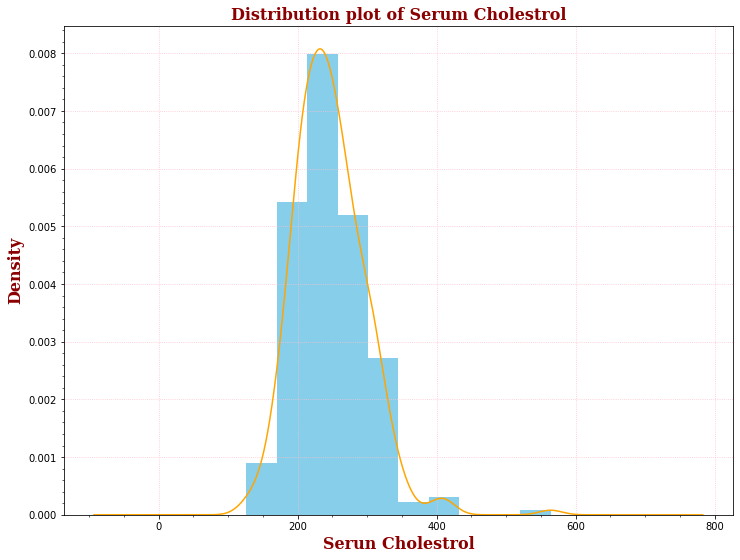

In [130]:
cleveland_df['cholestrol'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['cholestrol'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Serun Cholestrol',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Serum Cholestrol',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Cholestrol level')

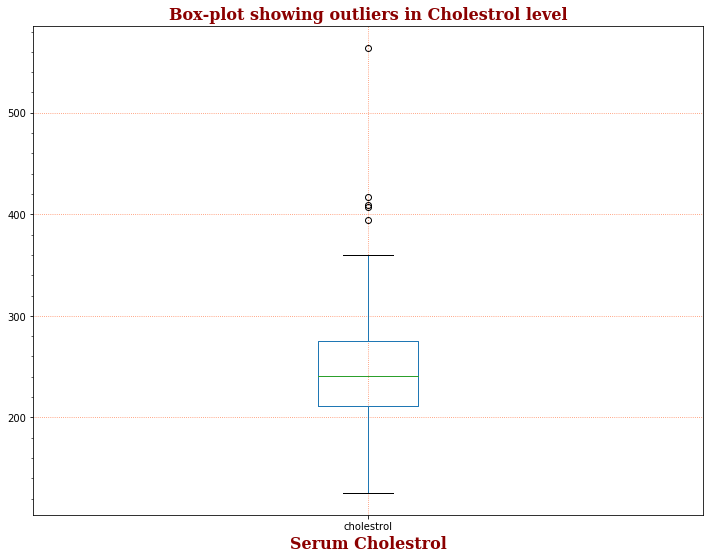

In [131]:
cleveland_df['cholestrol'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Serum Cholestrol',fontdict=font)
plt.title('Box-plot showing outliers in Cholestrol level',fontdict=font)

### **Scaling**

In [132]:
cleveland_df['scaled_cholestrol'] = (cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()

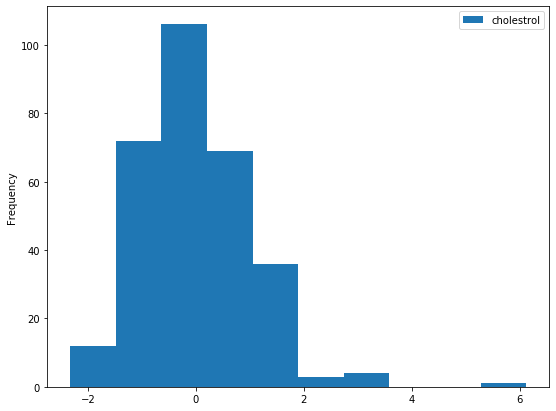

In [133]:
pd.DataFrame((cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()).plot(kind='hist',figsize=(9,7))

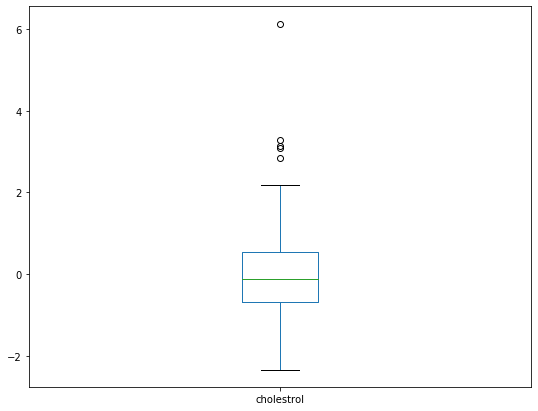

In [134]:
pd.DataFrame((cleveland_df['cholestrol'] - cleveland_df['cholestrol'].mean())/cleveland_df['cholestrol'].std()).plot(kind='box',figsize=(9,7))

## **Feature: MAX_HRT_RATE**

Text(0.5, 1.0, 'Distribution plot of Maximum heart-rate achieved')

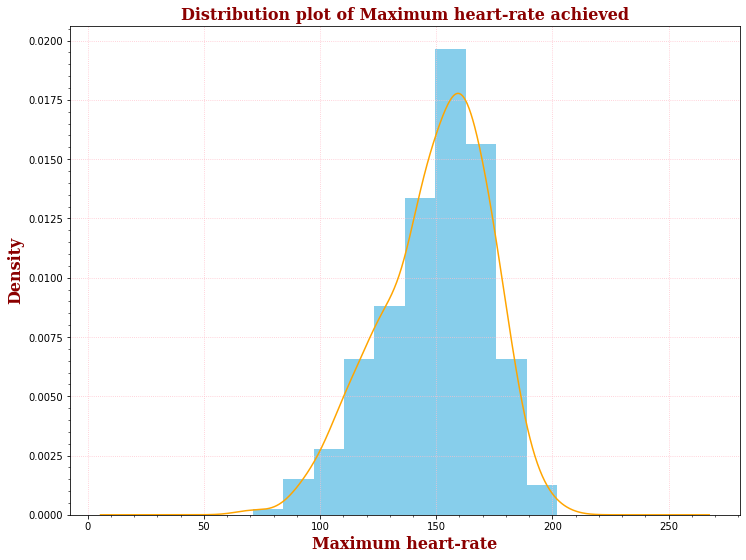

In [135]:
cleveland_df['max_hrt_rate'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['max_hrt_rate'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Maximum heart-rate',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Maximum heart-rate achieved',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Max Heart Rate')

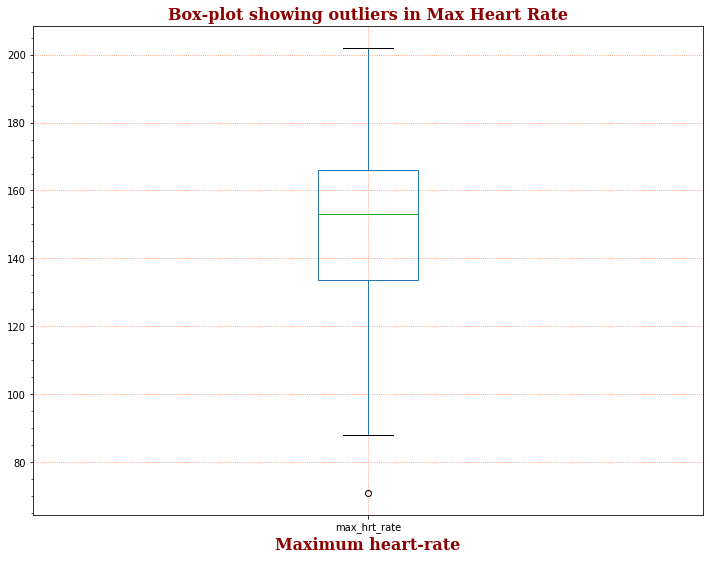

In [136]:
cleveland_df['max_hrt_rate'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Maximum heart-rate',fontdict=font)
plt.title('Box-plot showing outliers in Max Heart Rate',fontdict=font)

### **Scaling**

In [137]:
cleveland_df['scaled_max_hrt_rate'] = (cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()

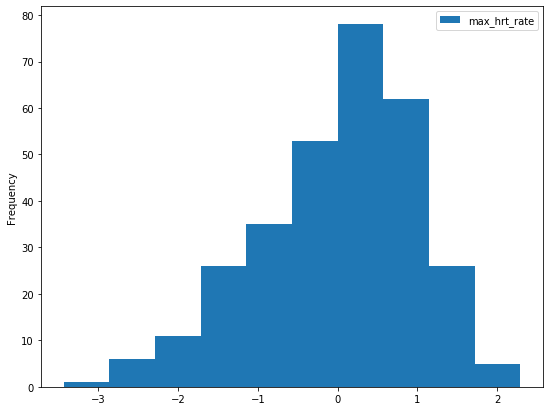

In [138]:
pd.DataFrame((cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()).plot(kind='hist',figsize=(9,7))

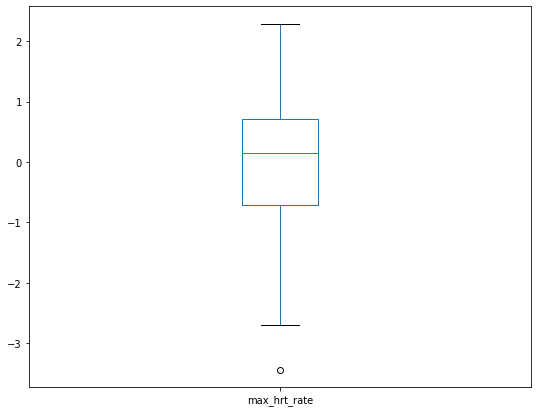

In [139]:
pd.DataFrame((cleveland_df['max_hrt_rate'] - cleveland_df['max_hrt_rate'].mean())/cleveland_df['max_hrt_rate'].std()).plot(kind='box',figsize=(9,7))

## **Feature: OLDPEAK**

Text(0.5, 1.0, 'Distribution plot of ST depression induced by exercise relative to rest')

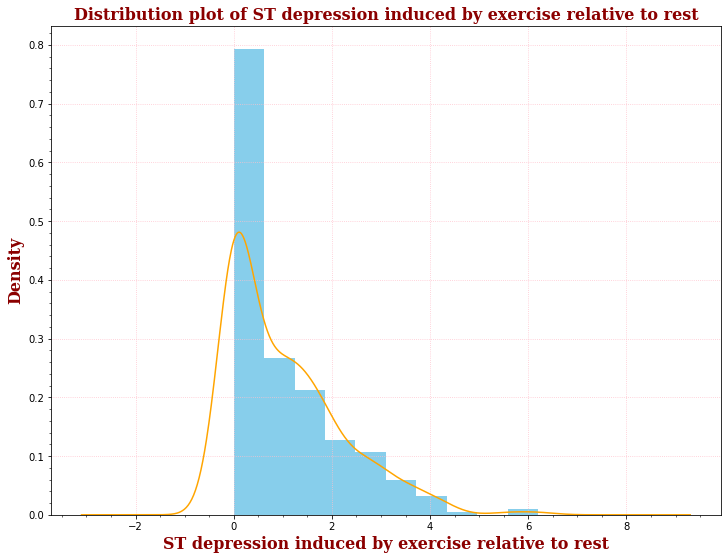

In [140]:
cleveland_df['oldpeak'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['oldpeak'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('ST depression induced by exercise relative to rest',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of ST depression induced by exercise relative to rest',fontdict=font)

### **BOX-PLOT -- Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in OLDPEAK')

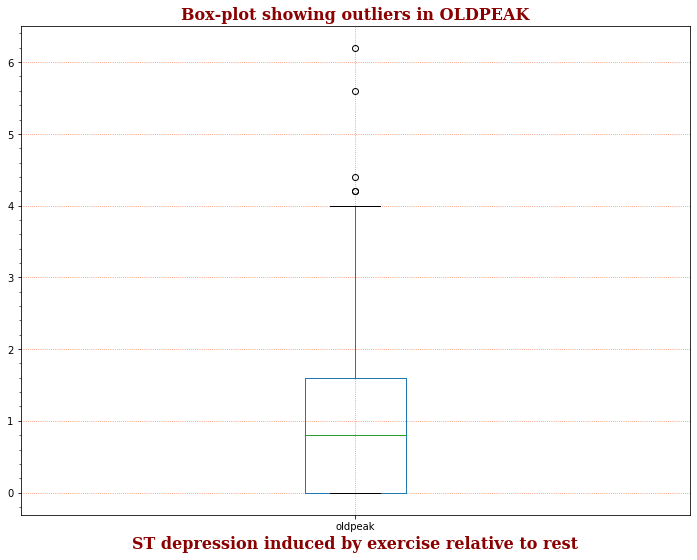

In [141]:
cleveland_df['oldpeak'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('ST depression induced by exercise relative to rest',fontdict=font)
plt.title('Box-plot showing outliers in OLDPEAK',fontdict=font)

### **Scaling**

In [142]:
cleveland_df['scaled_oldpeak'] = (cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()

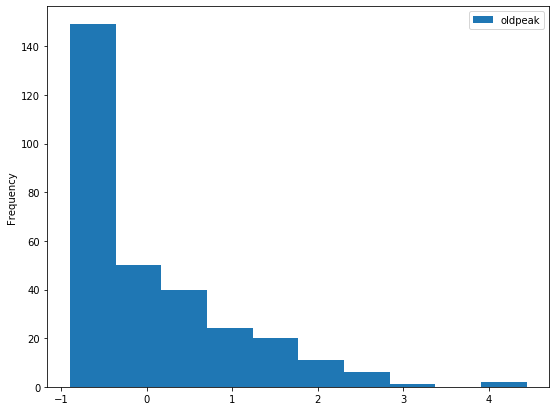

In [143]:
pd.DataFrame((cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()).plot(kind='hist',figsize=(9,7))

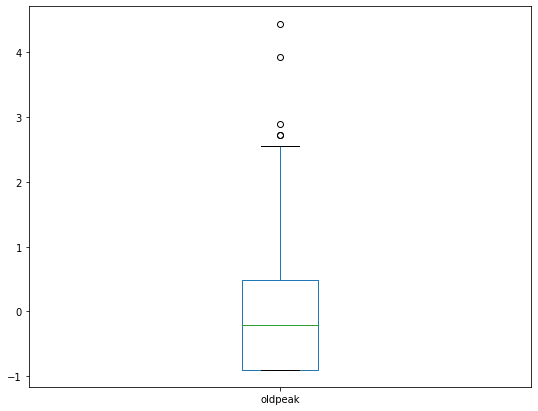

In [144]:
pd.DataFrame((cleveland_df['oldpeak'] - cleveland_df['oldpeak'].mean())/cleveland_df['oldpeak'].std()).plot(kind='box',figsize=(9,7))

## **Feature: AGE**

Text(0.5, 1.0, 'Distribution plot of Payment Age')

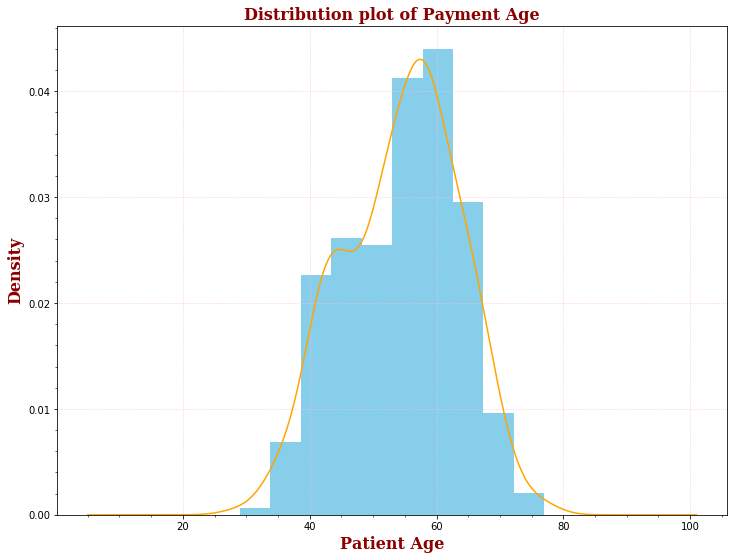

In [145]:
cleveland_df['age'].plot(kind='hist',density=True,figsize=(12,9),color='skyblue')
cleveland_df['age'].plot(kind='density',color='orange')
plt.minorticks_on()
plt.grid(which='major',color='pink',linestyle=':')
plt.xlabel('Patient Age',fontdict=font)
plt.ylabel('Density',fontdict=font)
plt.title('Distribution plot of Payment Age',fontdict=font)

### **BOX-PLOT: Outlier Detection**

Text(0.5, 1.0, 'Box-plot showing outliers in Patient Age')

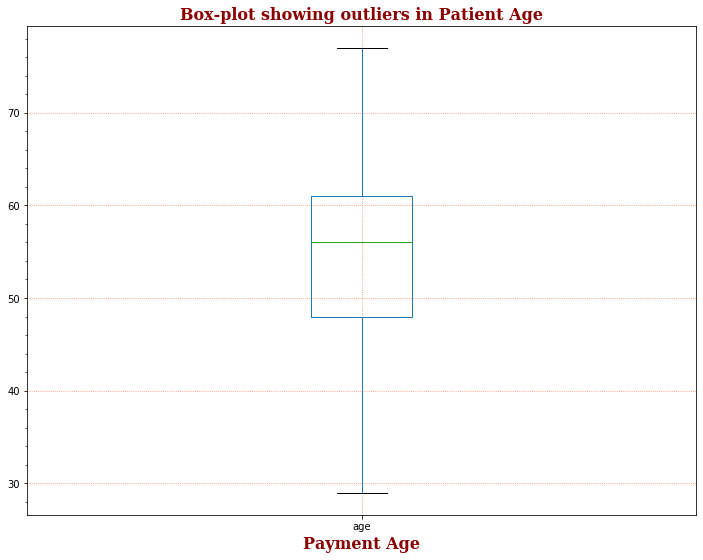

In [146]:
cleveland_df['age'].plot(kind='box',figsize=(12,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Payment Age',fontdict=font)
plt.title('Box-plot showing outliers in Patient Age',fontdict=font)

### **Scaling**

In [147]:
cleveland_df['scaled_age'] = (cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()

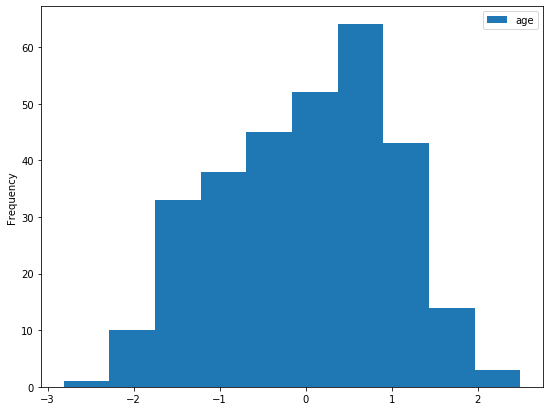

In [148]:
pd.DataFrame((cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()).plot(kind='hist',figsize=(9,7))

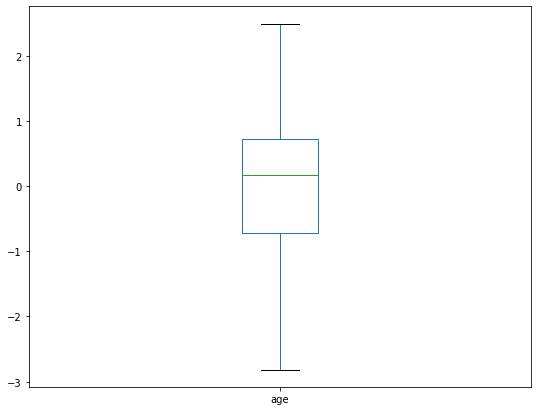

In [149]:
pd.DataFrame((cleveland_df['age'] - cleveland_df['age'].mean())/cleveland_df['age'].std()).plot(kind='box',figsize=(9,7))

In [150]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal', 'scaled_rest_bp',
       'scaled_cholestrol', 'scaled_max_hrt_rate', 'scaled_oldpeak',
       'scaled_age'],
      dtype='object')

## **Feature Scaling and Transformation**

In [152]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats
import numpy as np

In [154]:
mms = MinMaxScaler()

In [155]:
rs = RobustScaler()

In [156]:
qt = QuantileTransformer(n_quantiles=303)

In [158]:
cleveland_df['trans_rest_bp'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(rs.fit_transform(cleveland_df[['rest_bp']]))))))

In [160]:
cleveland_df['trans_cholestrol'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(rs.fit_transform(cleveland_df[['cholestrol']]))))))

In [161]:
cleveland_df['trans_max_hrt_rate'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(rs.fit_transform(cleveland_df[['max_hrt_rate']]))))))

In [162]:
cleveland_df['trans_oldpeak'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(rs.fit_transform(cleveland_df[['oldpeak']]))))))

In [163]:
cleveland_df['trans_age'] = np.log1p(qt.fit_transform(pd.DataFrame(stats.zscore(pd.DataFrame(rs.fit_transform(cleveland_df[['age']]))))))

# **Visualize data distribution of quantitative features**

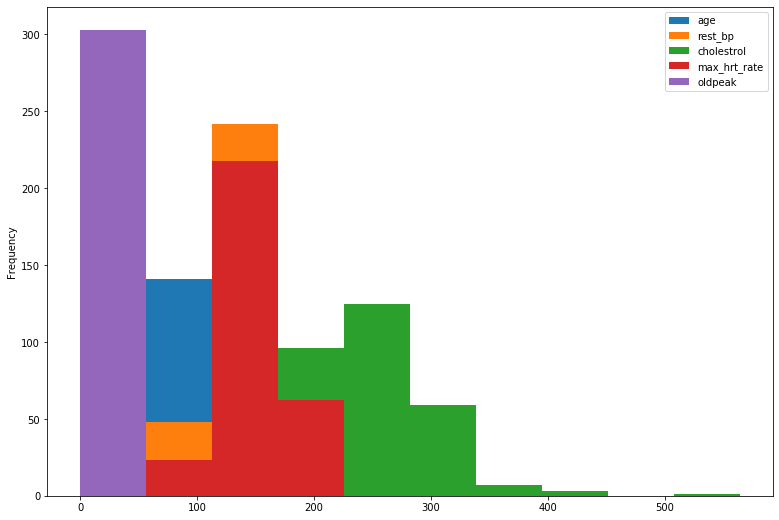

In [170]:
cleveland_df[['age','rest_bp','cholestrol','max_hrt_rate','oldpeak']].plot(kind='hist',figsize=(13,9))

In [204]:
def plot_distribution(df_name,column):
    """
    Description: This function will plot the distribution plot of features
    
    Input parameters: This function accepts below two inputs:
        df_name: This is the dataframe whose feature to be plot
        column: Feature whose distribution to be plot
    
    Return: None
    """
    for col_name in column:
        hist_label_style={'family':'serif','color':'red','size':16}
        df_name[col_name].plot(kind='hist',figsize=(9,7),color='lightblue')
        plt.minorticks_on()
        plt.grid(which='major',linestyle=':',color='pink')
        plt.xlabel(str(col_name).upper(),fontdict=hist_label_style)
        plt.ylabel('Frequency',fontdict=hist_label_style)
        plt.title('Distribution plot of '+str(col_name).upper(),fontdict=hist_label_style)
        plt.show()

## **AGE, SCALED_AGE & TRANS_AGE**

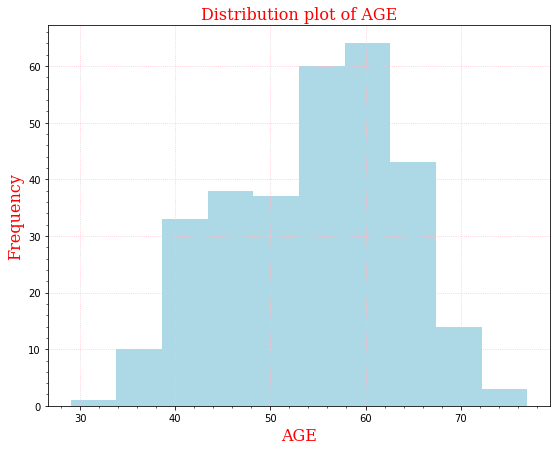

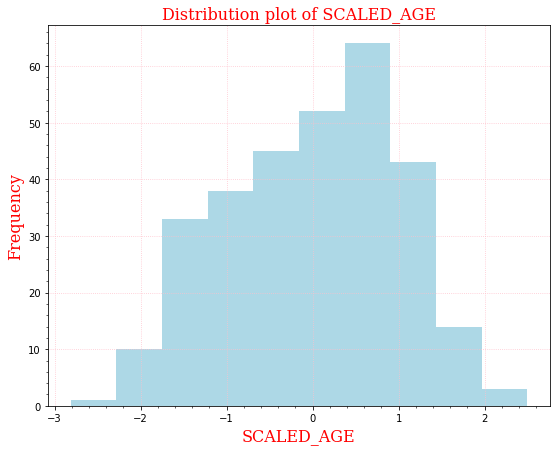

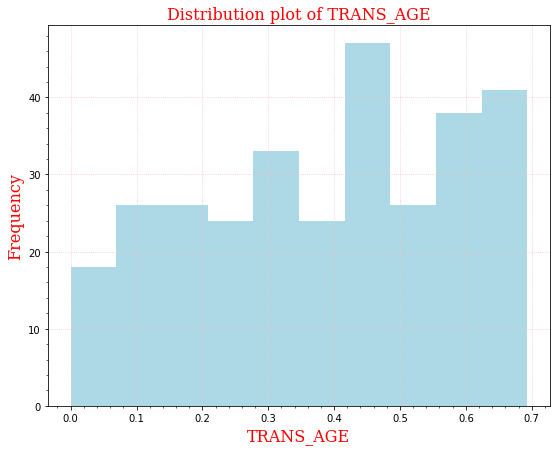

In [205]:
plot_distribution(cleveland_df,['age','scaled_age','trans_age'])

## **REST_BP, SCALED_REST_BP & TRANS_REST_BP**

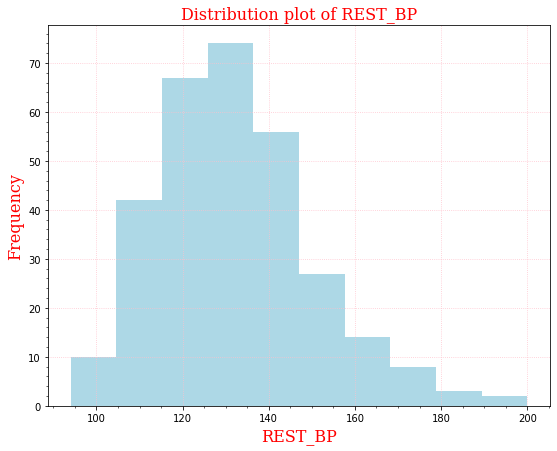

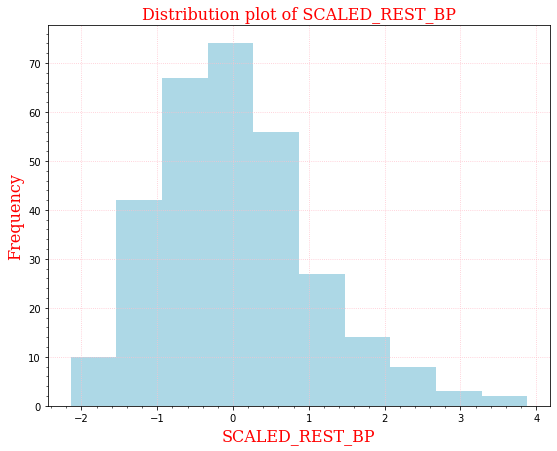

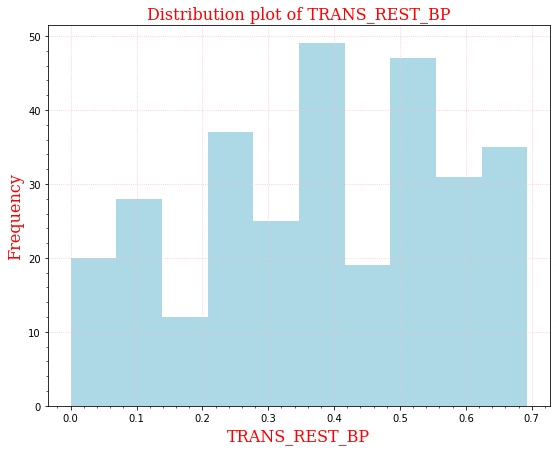

In [206]:
plot_distribution(cleveland_df,['rest_bp','scaled_rest_bp','trans_rest_bp'])

## **CHOLESTROL, SCALED_CHOLESTROL & TRANS_CHOLESTROL**

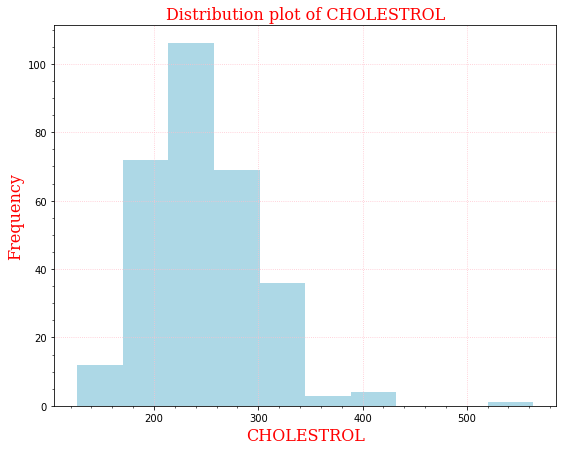

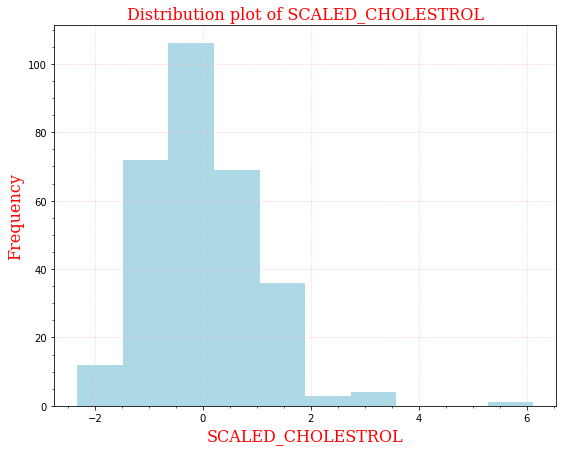

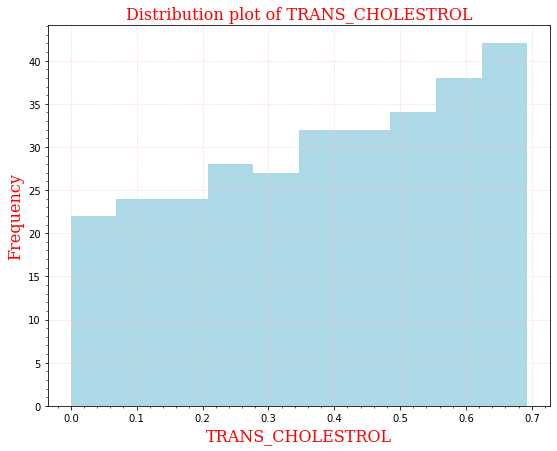

In [207]:
plot_distribution(cleveland_df,['cholestrol','scaled_cholestrol','trans_cholestrol'])

## **MAX_HRT_RATE, SCALED_MAX_HRT_RATE & TRANS_MAX_HRT_RATE**

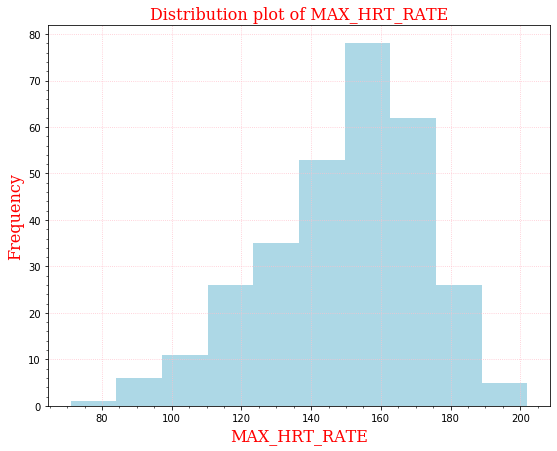

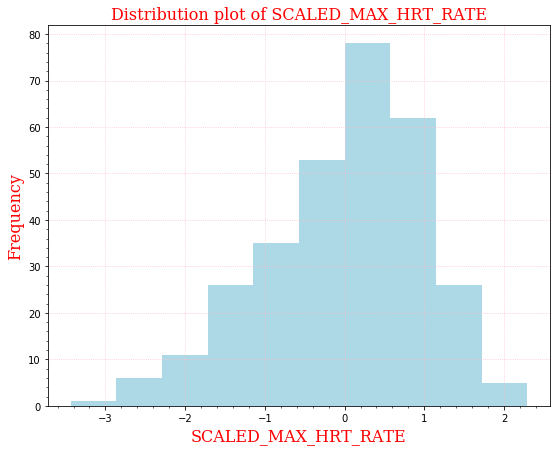

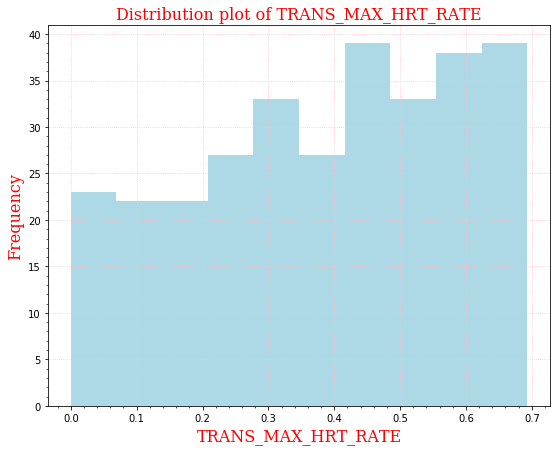

In [208]:
plot_distribution(cleveland_df,['max_hrt_rate','scaled_max_hrt_rate','trans_max_hrt_rate'])

## **OLDPEAK, SCALED_OLDPEAK & TRANS_OLDPEAK**

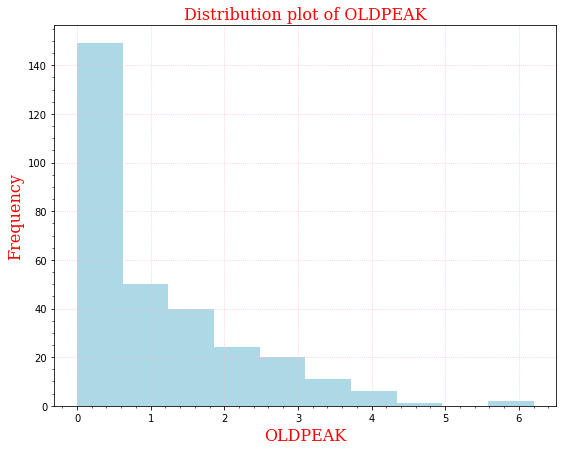

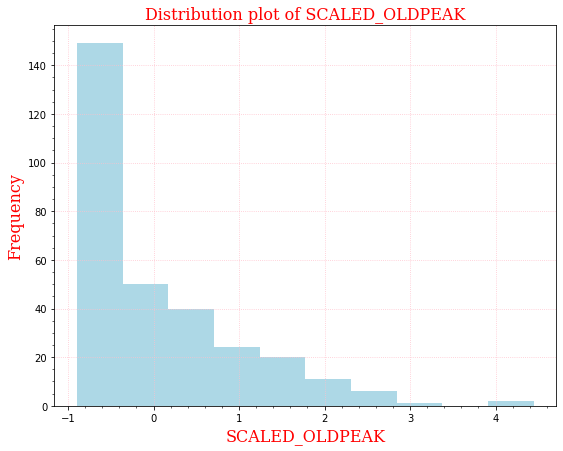

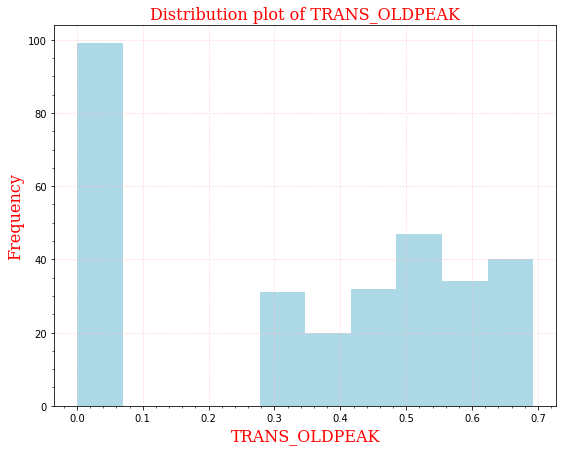

In [209]:
plot_distribution(cleveland_df,['oldpeak','scaled_oldpeak','trans_oldpeak'])

## **Outlier detection in Quantitative Features**

### **CASE-I: On raw features**

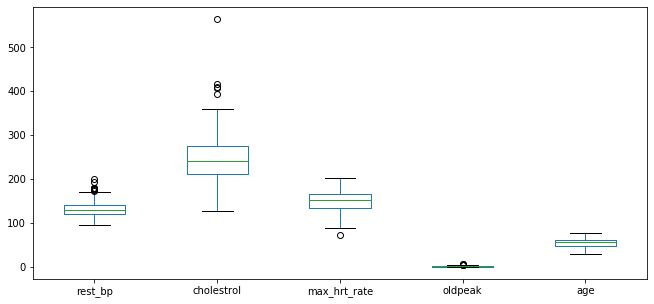

In [165]:
cleveland_df[['rest_bp','cholestrol','max_hrt_rate','oldpeak','age']].plot(kind='box',figsize=(11,5))

### **CASE-II: On Scaled features**

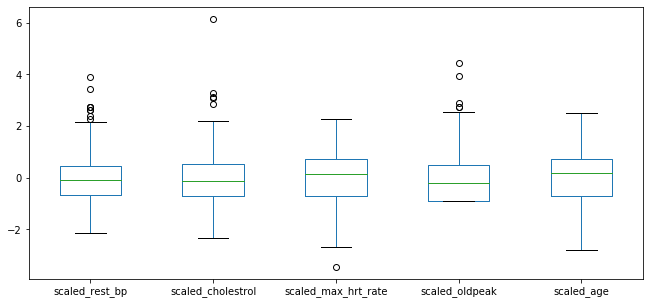

In [166]:
cleveland_df[['scaled_rest_bp','scaled_cholestrol','scaled_max_hrt_rate','scaled_oldpeak','scaled_age']].plot(kind='box',figsize=(11,5))

### **CASE-III: On Scaled & Transformed features**

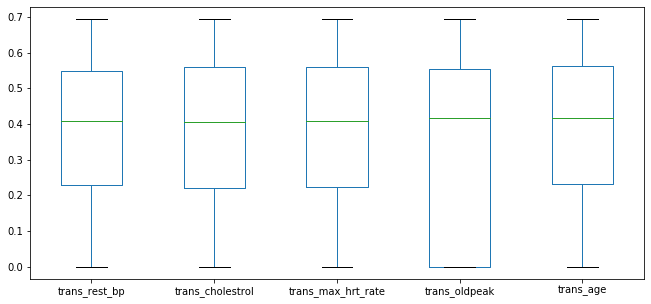

In [164]:
cleveland_df[['trans_rest_bp','trans_cholestrol','trans_max_hrt_rate','trans_oldpeak','trans_age']].plot(kind='box',figsize=(11,5))

## **Feature co-relation plot**

(13.0, 0.0)

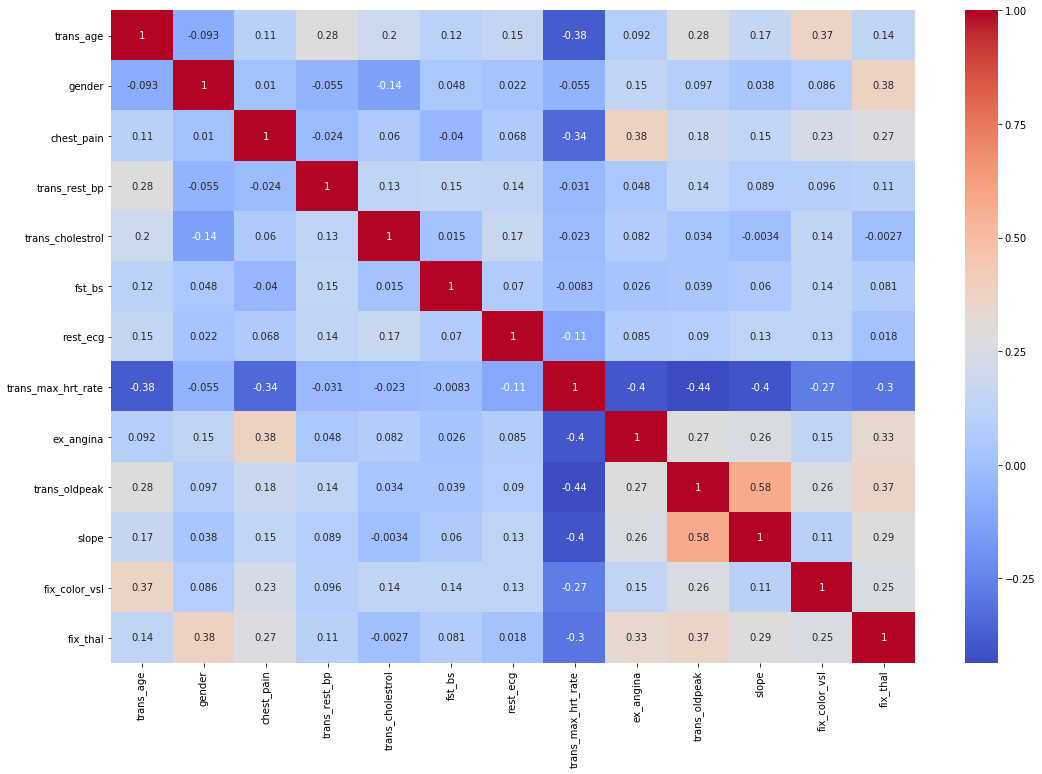

In [229]:
plt.figure(figsize=(18,12))
ax=sns.heatmap(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol','fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak','slope',
                          'fix_color_vsl','fix_thal']].corr(), cmap='coolwarm',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **Model Selection and Evaluation**

In [230]:
cleveland_df.columns

Index(['fix_thal_3', 'fix_thal_6', 'fix_thal_7', 'fix_color_vsl_0',
       'fix_color_vsl_1', 'fix_color_vsl_2', 'fix_color_vsl_3', 'slope_1',
       'slope_2', 'slope_3', 'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'chest_pain_4',
       'ex_angina_0', 'ex_angina_1', 'fst_bs_0', 'fst_bs_1', 'gender_0',
       'gender_1', 'age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol',
       'fst_bs', 'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'result', 'fix_color_vsl', 'fix_thal', 'scaled_rest_bp',
       'scaled_cholestrol', 'scaled_max_hrt_rate', 'scaled_oldpeak',
       'scaled_age', 'trans_rest_bp', 'trans_cholestrol', 'trans_max_hrt_rate',
       'trans_oldpeak', 'trans_age'],
      dtype='object')

X_cleveland_df = cleveland_df[['trans_age','gender','chest_pain_1','chest_pain_2','chest_pain_3','chest_pain_4','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg_0','rest_ecg_1','rest_ecg_2','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope_1','slope_2','slope_3','fix_color_vsl_0','fix_color_vsl_1','fix_color_vsl_2','fix_color_vsl_3',
                               'fix_thal_3','fix_thal_6','fix_thal_7']]#.iloc[0:250,]

In [231]:
X_cleveland_df = cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']]#.iloc[0:250,]

In [233]:
cleveland_df.shape,X_cleveland_df.shape

((303, 47), (303, 13))

In [232]:
X_cleveland_df.head()

,trans_age,gender,chest_pain,trans_rest_bp,trans_cholestrol,fst_bs,rest_ecg,trans_max_hrt_rate,ex_angina,trans_oldpeak,slope,fix_color_vsl,fix_thal
0,0.597671,1,1,0.591276,0.354520,1,2,0.369506,0,0.618402,3,0,6
1,0.657760,1,4,0.659474,0.587603,0,2,0.045315,1,0.538583,2,3,3
2,0.657760,1,4,0.229744,0.327444,0,2,0.175677,1,0.634332,2,2,7
3,0.026145,1,3,0.408771,0.454991,0,0,0.683164,0,0.671389,3,0,3
4,0.071859,0,2,0.408771,0.178451,0,2,0.607640,0,0.520054,1,0,3


In [234]:
Y_cleveland_df = cleveland_df['result']#.iloc[0:250,]

In [235]:
Y_cleveland_df.head()

0    0
1    1
2    1
3    0
4    0
Name: result, dtype: int32

In [236]:
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc_scr
from sklearn.metrics import precision_score as prec_scr
from sklearn.metrics import recall_score as rec_scr
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB

### **Data Oversampling**

In [238]:
pd.DataFrame(cleveland_df['result'].value_counts())

,result
0,164
1,139


In [240]:
from imblearn.over_sampling import RandomOverSampler

In [241]:
over_samp=RandomOverSampler(ratio=1)

In [243]:
X_train_res,y_train_res = over_samp.fit_sample(X_cleveland_df,Y_cleveland_df)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [250]:
pd.concat([pd.DataFrame(X_train_res),pd.DataFrame(y_train_res)],axis=1).shape

(328, 14)

In [251]:
X_train_split, X_test_split, y_train_split, y_test_split = tts(X_train_res,y_train_res)

In [252]:
X_train_res.shape,X_train_split.shape,X_test_split.shape

((328, 13), (246, 13), (82, 13))

## **Gradient Boosting Classifier**

In [253]:
model_gbc = GradientBoostingClassifier()

In [254]:
model_gbc.fit(X_train_split,y_train_split)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [255]:
y_predict_gbc = model_gbc.predict(X_test_split)

In [256]:
acc_scr(y_test_split,y_predict_gbc)

0.8414634146341463

In [257]:
prec_scr(y_test_split,y_predict_gbc)

0.8888888888888888

In [258]:
rec_scr(y_test_split,y_predict_gbc)

0.7804878048780488

In [259]:
roc_auc_score(y_test_split,y_predict_gbc)

0.8414634146341464

## **Naive Bayes**

In [260]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [261]:
model_nb = GaussianNB()

In [262]:
model_nb.fit(X_train_split,y_train_split)

GaussianNB(priors=None, var_smoothing=1e-09)

In [263]:
y_predict_nb = model_nb.predict(X_test_split)

In [264]:
acc_scr(y_test_split,y_predict_nb)

0.8170731707317073

In [265]:
prec_scr(y_test_split,y_predict_nb)

0.825

In [266]:
rec_scr(y_test_split,y_predict_nb)

0.8048780487804879

In [267]:
roc_auc_score(y_test_split,y_predict_nb)

0.8170731707317074

## **Cross-validation score**

### **GBC**

In [268]:
cross_val_score(GradientBoostingClassifier(),X_train_res,y_train_res,cv=10)

array([0.93939394, 0.84848485, 0.90909091, 0.84848485, 0.84848485,
       0.60606061, 0.6969697 , 0.87878788, 0.8125    , 0.9375    ])

In [269]:
cross_val_score(GradientBoostingClassifier(),X_train_res,y_train_res,cv=10).mean()*100

82.95454545454547

### **GNB**

In [270]:
cross_val_score(GaussianNB(),X_train_res,y_train_res,cv=10)

array([0.84848485, 0.6969697 , 0.84848485, 0.87878788, 0.84848485,
       0.66666667, 0.81818182, 0.81818182, 0.78125   , 0.90625   ])

In [271]:
cross_val_score(GaussianNB(),X_train_res,y_train_res,cv=10).mean()*100

81.11742424242424

## **Logistic Regression**

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
model_lr = LogisticRegression()

In [274]:
model_lr.fit(X_train_split,y_train_split)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
y_predict_lr = model_lr.predict(X_test_split)

In [276]:
acc_scr(y_test_split,y_predict_lr)

0.8292682926829268

In [277]:
prec_scr(y_test_split,y_predict_lr)

0.8292682926829268

In [278]:
rec_scr(y_test_split,y_predict_lr)

0.8292682926829268

In [279]:
roc_auc_score(y_test_split,y_predict_lr)

0.8292682926829268

### **LR -- Cross Validation**

In [280]:
cross_val_score(LogisticRegression(),X_train_res,y_train_res,cv=10)

array([0.87878788, 0.78787879, 0.90909091, 0.87878788, 0.84848485,
       0.66666667, 0.81818182, 0.87878788, 0.78125   , 0.875     ])

In [281]:
cross_val_score(LogisticRegression(),X_train_res,y_train_res,cv=10).mean()*100

83.22916666666667

## **Decision-Tree**

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

In [283]:
model_dt = DecisionTreeClassifier()

In [284]:
model_dt.fit(X_train_split,y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [285]:
y_predict_dt = model_dt.predict(X_test_split)

In [286]:
acc_scr(y_test_split,y_predict_dt)

0.7926829268292683

In [287]:
prec_scr(y_test_split,y_predict_dt)

0.8

In [288]:
rec_scr(y_test_split,y_predict_dt)

0.7804878048780488

### **DT -- Cross Validation**

In [289]:
cross_val_score(DecisionTreeClassifier(),X_train_res,y_train_res,cv=10)

array([0.81818182, 0.78787879, 0.81818182, 0.81818182, 0.72727273,
       0.63636364, 0.66666667, 0.72727273, 0.84375   , 0.8125    ])

In [290]:
cross_val_score(DecisionTreeClassifier(),X_train_res,y_train_res,cv=10).mean()*100

76.57196969696972

## **Random Forest**

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [292]:
model_rf = RandomForestClassifier()

In [293]:
model_rf.fit(X_train_split,y_train_split)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [294]:
y_predict_rf = model_rf.predict(X_test_split)

In [295]:
acc_scr(y_test_split,y_predict_rf)

0.8414634146341463

In [296]:
prec_scr(y_test_split,y_predict_rf)

0.9375

In [297]:
rec_scr(y_test_split,y_predict_rf)

0.7317073170731707

In [298]:
roc_auc_score(y_test_split,y_predict_rf)

0.8414634146341463

### **RF -- Cross validation**

In [299]:
cross_val_score(RandomForestClassifier(),X_train_res,y_train_res,cv=10)

array([0.93939394, 0.87878788, 0.87878788, 0.87878788, 0.87878788,
       0.66666667, 0.78787879, 0.87878788, 0.875     , 0.9375    ])

In [300]:
cross_val_score(RandomForestClassifier(),X_train_res,y_train_res,cv=10).mean()*100

86.30681818181817

# _**Model Hyperparameterization/Tuning**_

In [302]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### _**1. Gradient Boosting Classifier**_

### _**Finding best values for LEARNING_RATE and N_ESTIMATORS**_

In [303]:
%%time
p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250]}

tuning_lr_est = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, 
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  subsample=1,
                                                                  max_features='sqrt',
                                                                  random_state=10),
                             param_grid = p_test1,scoring='f1',n_jobs=4,iid=False,cv=10)

tuning_lr_est.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 47.4 s


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [304]:
tuning_lr_est.best_params_, tuning_lr_est.best_score_

({'learning_rate': 0.05, 'n_estimators': 750}, 0.8616512817248111)

In [305]:
pd.DataFrame(tuning_lr_est.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
17,0.790986,0.020874,0.002294,4.572996e-04,0.05,1250,"{'learning_rate': 0.05, 'n_estimators': 1250}",0.933333,0.875000,0.941176,0.909091,0.941176,0.611111,0.742857,0.909091,0.812500,0.941176,0.861651,0.103966,1
16,0.715990,0.027410,0.001994,5.309834e-07,0.05,1000,"{'learning_rate': 0.05, 'n_estimators': 1000}",0.933333,0.875000,0.941176,0.909091,0.941176,0.611111,0.742857,0.909091,0.812500,0.941176,0.861651,0.103966,1
15,0.595109,0.007543,0.001795,3.988267e-04,0.05,750,"{'learning_rate': 0.05, 'n_estimators': 750}",0.933333,0.875000,0.941176,0.909091,0.941176,0.611111,0.742857,0.909091,0.812500,0.941176,0.861651,0.103966,1
8,0.400729,0.066326,0.001596,4.889284e-04,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.933333,0.875000,0.941176,0.882353,0.888889,0.685714,0.742857,0.909091,0.812500,0.941176,0.861209,0.082985,4
11,0.555610,0.011306,0.001795,3.988387e-04,0.1,1250,"{'learning_rate': 0.1, 'n_estimators': 1250}",0.933333,0.875000,0.941176,0.882353,0.888889,0.685714,0.742857,0.909091,0.812500,0.941176,0.861209,0.082985,4
10,0.488993,0.012101,0.001895,5.364767e-04,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.933333,0.875000,0.941176,0.882353,0.888889,0.685714,0.742857,0.909091,0.812500,0.941176,0.861209,0.082985,4
9,0.431546,0.038523,0.001496,4.987002e-04,0.1,750,"{'learning_rate': 0.1, 'n_estimators': 750}",0.933333,0.875000,0.941176,0.882353,0.888889,0.685714,0.742857,0.909091,0.812500,0.941176,0.861209,0.082985,4
14,0.399333,0.008239,0.001596,4.888892e-04,0.05,500,"{'learning_rate': 0.05, 'n_estimators': 500}",0.933333,0.875000,0.941176,0.909091,0.941176,0.611111,0.722222,0.909091,0.812500,0.941176,0.859588,0.106477,8
12,0.080285,0.001115,0.001197,3.993751e-04,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.933333,0.838710,0.969697,0.875000,0.941176,0.647059,0.742857,0.875000,0.812500,0.941176,0.857651,0.096313,9
13,0.196874,0.002828,0.001297,4.569394e-04,0.05,250,"{'learning_rate': 0.05, 'n_estimators': 250}",0.933333,0.875000,0.941176,0.875000,0.941176,0.628571,0.742857,0.875000,0.812500,0.941176,0.856579,0.097592,10


### _**Finding best value for MAX_DEPTH**_

In [306]:
%%time
p_test2 = {'max_depth':[1,2,4,8,16,24] }

tuning_mx_depth = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,
                                                                    n_estimators=750,
                                                                    min_samples_split=2,
                                                                    min_samples_leaf=1,
                                                                    subsample=1,
                                                                    max_features='sqrt',
                                                                    random_state=10),
                               param_grid = p_test2,scoring='f1',n_jobs=4,iid=False,cv=10)

tuning_mx_depth.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 8.19 s


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=750,
                                                  n_iter_no_change=None,
      

In [307]:
tuning_mx_depth.best_params_, tuning_mx_depth.best_score_

({'max_depth': 4}, 0.86120904422375)

In [308]:
pd.DataFrame(tuning_mx_depth.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.421574,0.017136,0.001795,0.000399,4,{'max_depth': 4},0.933333,0.875000,0.941176,0.882353,0.888889,0.685714,0.742857,0.909091,0.812500,0.941176,0.861209,0.082985,1
4,0.356148,0.005823,0.001496,0.000498,16,{'max_depth': 16},0.933333,0.866667,0.875000,0.875000,0.914286,0.705882,0.722222,0.875000,0.875000,0.914286,0.855668,0.074002,2
5,0.353854,0.007787,0.001197,0.000399,24,{'max_depth': 24},0.933333,0.866667,0.875000,0.875000,0.914286,0.705882,0.722222,0.875000,0.875000,0.914286,0.855668,0.074002,2
1,0.325530,0.003403,0.001396,0.000488,2,{'max_depth': 2},0.933333,0.848485,0.909091,0.857143,0.914286,0.684211,0.800000,0.848485,0.812500,0.941176,0.854871,0.073548,4
0,0.261003,0.002363,0.001396,0.000489,1,{'max_depth': 1},0.933333,0.882353,0.882353,0.909091,0.882353,0.705882,0.764706,0.774194,0.838710,0.941176,0.851415,0.074692,5
3,0.444413,0.007830,0.001496,0.000499,8,{'max_depth': 8},0.933333,0.838710,0.969697,0.848485,0.833333,0.666667,0.685714,0.838710,0.848485,0.914286,0.837742,0.092217,6


### _**Finding best values for MIN_SAMPLES_LEAF and MIN_SAMPLES_SPLIT**_

In [312]:
%%time
p_test3 = {'min_samples_split':[2,4,6,8,10,20,40,60], 'min_samples_leaf':[1,3,5,7,9]}

tuning_min_samp_leaf_split = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,
                                                                               n_estimators=750,
                                                                               max_depth=4,
                                                                               subsample=0.8,
                                                                               max_features=3,
                                                                               random_state=10),
                                         param_grid = p_test3, scoring='f1',n_jobs=4,iid=False,cv=10)

tuning_min_samp_leaf_split.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 55.6 s


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features=3,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=750,
                                                  n_iter_no_change=None,
           

In [313]:
tuning_min_samp_leaf_split.best_params_, tuning_min_samp_leaf_split.best_score_

({'min_samples_leaf': 1, 'min_samples_split': 10}, 0.8534312664459722)

In [314]:
pd.DataFrame(tuning_min_samp_leaf_split.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.471340,0.014352,0.001596,4.891752e-04,1,10,"{'min_samples_leaf': 1, 'min_samples_split': 10}",0.933333,0.875000,0.941176,0.882353,0.888889,0.628571,0.722222,0.909091,0.812500,0.941176,0.853431,0.098434,1
11,0.596007,0.073447,0.001795,7.461682e-04,3,8,"{'min_samples_leaf': 3, 'min_samples_split': 8}",0.933333,0.875000,0.909091,0.857143,0.888889,0.666667,0.764706,0.882353,0.812500,0.941176,0.853086,0.080113,2
39,0.498774,0.020382,0.001895,2.993506e-04,9,60,"{'min_samples_leaf': 9, 'min_samples_split': 60}",0.933333,0.875000,0.875000,0.857143,0.914286,0.666667,0.764706,0.857143,0.812500,0.969697,0.852547,0.083057,3
3,0.469745,0.007979,0.001795,3.990890e-04,1,8,"{'min_samples_leaf': 1, 'min_samples_split': 8}",0.933333,0.848485,0.875000,0.857143,0.888889,0.685714,0.764706,0.909091,0.812500,0.941176,0.851604,0.075223,4
0,0.478322,0.013067,0.001396,4.888115e-04,1,2,"{'min_samples_leaf': 1, 'min_samples_split': 2}",0.933333,0.875000,0.875000,0.882353,0.888889,0.666667,0.722222,0.909091,0.812500,0.941176,0.850623,0.085965,5
12,0.529086,0.019484,0.001994,4.460087e-04,3,10,"{'min_samples_leaf': 3, 'min_samples_split': 10}",0.933333,0.848485,0.875000,0.875000,0.909091,0.666667,0.742857,0.882353,0.812500,0.941176,0.848646,0.082175,6
13,0.511634,0.008661,0.001793,4.010333e-04,3,20,"{'min_samples_leaf': 3, 'min_samples_split': 20}",0.896552,0.875000,0.875000,0.882353,0.888889,0.628571,0.764706,0.909091,0.812500,0.941176,0.847384,0.086847,7
7,0.467649,0.004813,0.001895,2.992156e-04,1,60,"{'min_samples_leaf': 1, 'min_samples_split': 60}",0.933333,0.875000,0.909091,0.882353,0.888889,0.666667,0.764706,0.823529,0.812500,0.914286,0.847035,0.077883,8
1,0.474133,0.011320,0.001895,2.990731e-04,1,4,"{'min_samples_leaf': 1, 'min_samples_split': 4}",0.933333,0.848485,0.909091,0.857143,0.864865,0.666667,0.727273,0.909091,0.812500,0.941176,0.846962,0.085148,9
2,0.470044,0.007179,0.001795,3.990295e-04,1,6,"{'min_samples_leaf': 1, 'min_samples_split': 6}",0.933333,0.875000,0.909091,0.882353,0.888889,0.611111,0.705882,0.909091,0.812500,0.941176,0.846843,0.102259,10


### _**Finding best value for MAX_FEATURES**_

In [315]:
%%time
p_test4 = {'max_features':[2,3,4,5,6,7]}

tuning_max_features = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,
                                                            n_estimators=750,
                                                            max_depth=4,
                                                            min_samples_split=10,
                                                            min_samples_leaf=1,
                                                            subsample=0.8,
                                                            random_state=10),
                      param_grid = p_test4, scoring='f1',n_jobs=4,iid=False, cv=10)

tuning_max_features.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 11.5 s


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=10,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=750,
                                                  n_iter_no_change=None,
       

In [316]:
tuning_max_features.best_params_, tuning_max_features.best_score_

({'max_features': 2}, 0.8539210381122146)

In [317]:
pd.DataFrame(tuning_max_features.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.582643,0.125415,0.002095,0.000829,2,{'max_features': 2},0.933333,0.875000,0.909091,0.857143,0.888889,0.685714,0.727273,0.909091,0.8125,0.941176,0.853921,0.082300,1
1,0.708107,0.066625,0.002294,0.000457,3,{'max_features': 3},0.933333,0.875000,0.941176,0.882353,0.888889,0.628571,0.722222,0.909091,0.8125,0.941176,0.853431,0.098434,2
3,0.485805,0.017014,0.001695,0.000466,5,{'max_features': 5},0.896552,0.875000,0.941176,0.848485,0.888889,0.628571,0.764706,0.882353,0.8125,0.941176,0.847941,0.089246,3
5,0.615256,0.075443,0.001895,0.000698,7,{'max_features': 7},0.933333,0.848485,0.941176,0.857143,0.888889,0.666667,0.702703,0.882353,0.8125,0.941176,0.847443,0.091012,4
2,0.583141,0.086929,0.001995,0.000446,4,{'max_features': 4},0.933333,0.848485,0.875000,0.833333,0.914286,0.628571,0.727273,0.882353,0.8125,0.941176,0.839631,0.092610,5
4,0.478620,0.018376,0.001496,0.000499,6,{'max_features': 6},0.896552,0.848485,0.941176,0.848485,0.864865,0.628571,0.685714,0.848485,0.8125,0.941176,0.831601,0.096469,6


### _**Finding best values for SUBSAMPLE**_

In [319]:
%%time
p_test5= {'subsample':[0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning_subsample = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,
                                                                      n_estimators=750,
                                                                      max_depth=4,
                                                                      min_samples_split=10,
                                                                      min_samples_leaf=1,
                                                                      max_features=2,
                                                                      random_state=10),
                                param_grid = p_test5, scoring='f1',n_jobs=4,iid=False, cv=10)

tuning_subsample.fit(X_train_res,y_train_res)

C:\Users\j302\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 14.9 s


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features=2,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=10,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=750,
                                                  n_iter_no_change=None,
          

In [320]:
tuning_subsample.best_params_, tuning_subsample.best_score_

({'subsample': 0.75}, 0.8585166793990323)

In [321]:
pd.DataFrame(tuning_subsample.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.504351,0.016038,0.001895,0.000299,0.75,{'subsample': 0.75},0.933333,0.875,0.941176,0.848485,0.833333,0.685714,0.742857,0.909091,0.875000,0.941176,0.858517,0.081447,1
4,0.523801,0.021515,0.001695,0.000457,0.8,{'subsample': 0.8},0.933333,0.875,0.909091,0.857143,0.888889,0.685714,0.727273,0.909091,0.812500,0.941176,0.853921,0.082300,2
2,0.505050,0.015179,0.001895,0.000537,0.7,{'subsample': 0.7},0.933333,0.875,0.941176,0.848485,0.857143,0.647059,0.727273,0.909091,0.848485,0.941176,0.852822,0.091603,3
1,0.523800,0.032228,0.001895,0.000537,0.65,{'subsample': 0.65},0.933333,0.875,0.903226,0.848485,0.888889,0.685714,0.685714,0.909091,0.848485,0.941176,0.851911,0.088129,4
7,0.603686,0.063713,0.001995,0.000446,0.95,{'subsample': 0.95},0.896552,0.875,0.941176,0.882353,0.864865,0.628571,0.764706,0.909091,0.812500,0.941176,0.851599,0.090479,5
8,0.506247,0.082178,0.001695,0.000638,1,{'subsample': 1},0.933333,0.875,0.941176,0.823529,0.888889,0.611111,0.764706,0.909091,0.812500,0.941176,0.850051,0.097801,6
0,0.544943,0.019505,0.001895,0.000537,0.6,{'subsample': 0.6},0.933333,0.875,0.875000,0.848485,0.864865,0.666667,0.764706,0.882353,0.848485,0.941176,0.850007,0.076594,7
6,0.528387,0.034651,0.001995,0.000446,0.9,{'subsample': 0.9},0.933333,0.875,0.909091,0.823529,0.864865,0.628571,0.764706,0.909091,0.812500,0.941176,0.846186,0.090197,8
5,0.530583,0.040881,0.001596,0.000488,0.85,{'subsample': 0.85},0.933333,0.875,0.909091,0.848485,0.864865,0.685714,0.742857,0.875000,0.812500,0.914286,0.846113,0.074677,9


## _**2. Random Forest**_

### _**1. Finding the best value for N_ESTIMATORS**_

In [379]:
%%time
rf_test1 = {'n_estimators':[100,250,500,750,1000,1250]}

rf_nest = GridSearchCV(estimator=RandomForestClassifier(max_depth=8,
                                                        min_samples_split=4,
                                                        min_samples_leaf=1,
                                                        max_features=2,
                                                        random_state=10),
                             param_grid = rf_test1,scoring='f1',n_jobs=4,cv=10)

rf_nest.fit(X_train_res,y_train_res)

Wall time: 21.8 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                         

In [380]:
rf_nest.best_params_,rf_nest.best_score_

({'n_estimators': 1000}, 0.8562473405784601)

In [381]:
pd.DataFrame(rf_nest.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,1.949589,0.044654,0.115292,0.002965,1000,{'n_estimators': 1000},0.933333,0.774194,0.909091,0.875,0.909091,0.705882,0.764706,0.875,0.875000,0.941176,0.856247,0.075840,1
5,2.360989,0.111128,0.135937,0.016873,1250,{'n_estimators': 1250},0.933333,0.774194,0.909091,0.875,0.909091,0.705882,0.764706,0.875,0.875000,0.941176,0.856247,0.075840,1
2,0.667615,0.011920,0.040990,0.002729,500,{'n_estimators': 500},0.933333,0.812500,0.909091,0.875,0.909091,0.705882,0.764706,0.875,0.838710,0.914286,0.853760,0.069820,3
3,1.104150,0.148186,0.071110,0.013690,750,{'n_estimators': 750},0.933333,0.774194,0.909091,0.875,0.909091,0.705882,0.764706,0.875,0.875000,0.914286,0.853558,0.073212,4
0,0.134637,0.003514,0.009974,0.001339,100,{'n_estimators': 100},0.903226,0.800000,0.909091,0.875,0.909091,0.666667,0.764706,0.875,0.848485,0.882353,0.843362,0.074203,5
1,0.335300,0.011793,0.021147,0.002044,250,{'n_estimators': 250},0.903226,0.758621,0.875000,0.875,0.909091,0.666667,0.764706,0.875,0.838710,0.914286,0.838031,0.077630,6


### _**2. Finding best value for MAX_DEPTH**_

In [382]:
%%time
rf_test2 = {'max_depth':[1,2,4,8,16,24]}

rf_max_depth = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,
                                                             min_samples_split=4,
                                                             min_samples_leaf=1,
                                                             max_features=2,
                                                             random_state=10),
                       param_grid=rf_test2,scoring='f1',n_jobs=4,cv=10)

rf_max_depth.fit(X_train_res,y_train_res)

Wall time: 4.64 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                      

In [383]:
rf_max_depth.best_params_,rf_max_depth.best_score_

({'max_depth': 16}, 0.8468137254901962)

In [384]:
pd.DataFrame(rf_max_depth.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.136934,0.010259,0.010073,0.002501,16,{'max_depth': 16},0.875000,0.764706,0.909091,0.848485,0.909091,0.705882,0.764706,0.87500,0.875000,0.941176,0.846814,0.072383,1
5,0.135234,0.009339,0.008876,0.000537,24,{'max_depth': 24},0.875000,0.764706,0.909091,0.848485,0.909091,0.705882,0.764706,0.87500,0.875000,0.941176,0.846814,0.072383,1
3,0.132047,0.001681,0.008776,0.000399,8,{'max_depth': 8},0.903226,0.800000,0.909091,0.875000,0.909091,0.666667,0.764706,0.87500,0.848485,0.882353,0.843362,0.074203,3
0,0.130352,0.015159,0.008677,0.000457,1,{'max_depth': 1},0.812500,0.714286,0.909091,0.903226,0.903226,0.705882,0.875000,0.81250,0.800000,0.882353,0.831806,0.072125,4
1,0.124666,0.002484,0.008378,0.000489,2,{'max_depth': 2},0.812500,0.689655,0.909091,0.903226,0.882353,0.764706,0.838710,0.81250,0.800000,0.882353,0.829509,0.065303,5
2,0.129653,0.006001,0.009076,0.000299,4,{'max_depth': 4},0.838710,0.733333,0.909091,0.875000,0.909091,0.666667,0.812500,0.83871,0.800000,0.903226,0.828633,0.075670,6


### _**3. Finding best vale for MIN_SAMPLES_SPLIT and MIN_SAMPLES_LEAF**_

In [356]:
%%time
rf_test3 = {'min_samples_split':[2,4,6,8,10,20,40,60], 'min_samples_leaf':[1,3,5,7,9]}

rf_min_samples_split_leaf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,
                                                                          max_depth=8),
                       param_grid=rf_test3,scoring='f1',n_jobs=4,cv=10)

rf_min_samples_split_leaf.fit(X_train_res,y_train_res)

Wall time: 22 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [357]:
rf_min_samples_split_leaf.best_params_,rf_min_samples_split_leaf.best_score_

({'min_samples_leaf': 1, 'min_samples_split': 4}, 0.8682057974705033)

In [358]:
pd.DataFrame(rf_min_samples_split_leaf.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.183600,0.030592,0.010001,0.002000,1,4,"{'min_samples_leaf': 1, 'min_samples_split': 4}",0.933333,0.875000,0.909091,0.875000,0.888889,0.742857,0.764706,0.875000,0.848485,0.969697,0.868206,0.066025,1
0,0.162398,0.006740,0.011600,0.002154,1,2,"{'min_samples_leaf': 1, 'min_samples_split': 2}",0.933333,0.812500,0.937500,0.875000,0.941176,0.705882,0.742857,0.875000,0.875000,0.914286,0.861254,0.078301,2
17,0.174007,0.022724,0.011193,0.002391,5,4,"{'min_samples_leaf': 5, 'min_samples_split': 4}",0.866667,0.785714,0.937500,0.875000,0.882353,0.705882,0.787879,0.838710,0.838710,0.937500,0.845591,0.067885,3
16,0.171200,0.016079,0.011600,0.002800,5,2,"{'min_samples_leaf': 5, 'min_samples_split': 2}",0.812500,0.785714,0.937500,0.875000,0.909091,0.722222,0.787879,0.875000,0.838710,0.909091,0.845271,0.064435,4
3,0.166000,0.011899,0.010800,0.001833,1,8,"{'min_samples_leaf': 1, 'min_samples_split': 8}",0.903226,0.800000,0.937500,0.875000,0.823529,0.705882,0.742857,0.875000,0.838710,0.909091,0.841080,0.070720,5
15,0.167204,0.020469,0.011996,0.003578,3,60,"{'min_samples_leaf': 3, 'min_samples_split': 60}",0.838710,0.709677,0.937500,0.875000,0.914286,0.764706,0.848485,0.848485,0.812500,0.857143,0.840649,0.063320,6
4,0.169601,0.011200,0.010800,0.001833,1,10,"{'min_samples_leaf': 1, 'min_samples_split': 10}",0.896552,0.800000,0.875000,0.875000,0.882353,0.666667,0.787879,0.875000,0.838710,0.909091,0.840625,0.069137,7
9,0.159996,0.002524,0.010400,0.001960,3,4,"{'min_samples_leaf': 3, 'min_samples_split': 4}",0.903226,0.774194,0.909091,0.875000,0.875000,0.705882,0.764706,0.838710,0.838710,0.909091,0.839361,0.066318,8
2,0.169199,0.015080,0.010801,0.001833,1,6,"{'min_samples_leaf': 1, 'min_samples_split': 6}",0.896552,0.774194,0.903226,0.875000,0.848485,0.666667,0.764706,0.875000,0.838710,0.941176,0.838371,0.077443,9
14,0.153600,0.003199,0.012000,0.001788,3,40,"{'min_samples_leaf': 3, 'min_samples_split': 40}",0.838710,0.764706,0.903226,0.875000,0.882353,0.742857,0.848485,0.848485,0.774194,0.903226,0.838124,0.055282,10


### _**4. Finding the best value for MAX_FEATURES**_

In [359]:
%%time
rf_test4 = {'max_features':[2,3,4,5,6,7]}

rf_max_features = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,
                                                                max_depth=8,
                                                                min_samples_split=4,
                                                                min_samples_leaf=1),
                       param_grid=rf_test4,scoring='f1',n_jobs=4,cv=10)

rf_max_features.fit(X_train_res,y_train_res)

Wall time: 5.28 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [360]:
rf_max_features.best_params_,rf_max_features.best_score_

({'max_features': 2}, 0.855857227055045)

In [362]:
pd.DataFrame(rf_max_features.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.169199,0.015393,0.011600,0.002154,2,{'max_features': 2},0.933333,0.838710,0.937500,0.848485,0.914286,0.666667,0.764706,0.875000,0.838710,0.941176,0.855857,0.082748,1
3,0.176400,0.019304,0.009600,0.001960,5,{'max_features': 5},0.933333,0.866667,0.969697,0.848485,0.848485,0.647059,0.742857,0.875000,0.848485,0.941176,0.852124,0.091167,2
4,0.170001,0.002000,0.010400,0.001959,6,{'max_features': 6},0.903226,0.848485,0.967742,0.875000,0.914286,0.647059,0.722222,0.875000,0.848485,0.914286,0.851579,0.091490,3
1,0.168797,0.016856,0.011203,0.002407,3,{'max_features': 3},0.933333,0.838710,0.875000,0.875000,0.882353,0.685714,0.764706,0.848485,0.875000,0.914286,0.849259,0.069561,4
5,0.173207,0.005938,0.010000,0.002000,7,{'max_features': 7},0.903226,0.838710,0.937500,0.875000,0.864865,0.685714,0.722222,0.875000,0.848485,0.941176,0.849190,0.079821,5
2,0.162400,0.002653,0.010400,0.001960,4,{'max_features': 4},0.933333,0.866667,0.941176,0.848485,0.823529,0.685714,0.722222,0.848485,0.875000,0.914286,0.845890,0.080091,6


### _**5. Finding best value for MIN_WEIGHT_FRACTION_LEAF**_

In [366]:
%%time
rf_test5 = {'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5]}

rf_min_wght_frac_leaf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,
                                                                      max_depth=8,
                                                                      min_samples_split=4,
                                                                      min_samples_leaf=1,
                                                                      max_features=2),
                       param_grid=rf_test5,scoring='f1',n_jobs=4,cv=10)

rf_min_wght_frac_leaf.fit(X_train_res,y_train_res)

Wall time: 5.21 s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state

In [367]:
rf_min_wght_frac_leaf.best_params_,rf_min_wght_frac_leaf.best_score_

({'min_weight_fraction_leaf': 0.1}, 0.846028785414459)

In [368]:
pd.DataFrame(rf_min_wght_frac_leaf.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_weight_fraction_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.171197,0.032873,0.012001,0.002531,0.1,{'min_weight_fraction_leaf': 0.1},0.812500,0.733333,0.909091,0.909091,0.941176,0.742857,0.838710,0.823529,0.812500,0.937500,0.846029,0.071782,1
1,0.174400,0.028464,0.010800,0.002561,0.2,{'min_weight_fraction_leaf': 0.2},0.812500,0.689655,0.909091,0.903226,0.909091,0.685714,0.812500,0.812500,0.838710,0.866667,0.823965,0.077693,2
3,0.171214,0.034128,0.010796,0.002567,0.4,{'min_weight_fraction_leaf': 0.4},0.875000,0.689655,0.800000,0.909091,0.909091,0.685714,0.875000,0.812500,0.774194,0.882353,0.821260,0.079607,3
2,0.160404,0.031419,0.011996,0.001790,0.3,{'min_weight_fraction_leaf': 0.3},0.774194,0.714286,0.823529,0.903226,0.800000,0.666667,0.787879,0.838710,0.800000,0.848485,0.795697,0.063883,4
4,0.148390,0.015532,0.008800,0.001600,0.5,{'min_weight_fraction_leaf': 0.5},0.653061,0.000000,0.653061,0.653061,0.000000,0.000000,0.680000,0.000000,0.709677,0.733333,0.408219,0.334194,5


In [ ]:
#     max_depth=4, 
#                                                         min_samples_split=2,
#                                                         min_samples_leaf=1,
#                                                         max_features='sqrt',
#                                                         min_weight_fraction_leaf=0.0,
#                                                         max_leaf_nodes=None,
#                                                         min_impurity_decrease=0.0,
#                                                         min_impurity_split=None,
#                                                         random_state=10

# _**Feature Selection**_

In [323]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

### _**1. Gradient Boosting Classifier**_

In [324]:
efsl = ExhaustiveFeatureSelector(GradientBoostingClassifier(learning_rate=0.1,
                                                            n_estimators=750,
                                                            max_depth=4,
                                                            min_samples_split=10,
                                                            min_samples_leaf=1,
                                                            max_features=2,
                                                            subsample=0.75,
                                                            random_state=None),
                                 min_features=7,
                                 max_features=10,
                                 scoring='f1',
                                 print_progress=True,
                                 n_jobs=6,
                                 cv=10)

In [325]:
%%time
efsl = efsl.fit(X_train_res,y_train_res,
                custom_feature_names=('trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol','fst_bs','rest_ecg','trans_max_hrt_rate',
                                      'ex_angina','trans_oldpeak','slope','fix_color_vsl','fix_thal'))

Features: 4004/4004

Wall time: 1h 55min 24s


In [326]:
efsl_result = pd.DataFrame.from_dict(efsl.get_metric_dict()).T
efsl_result.sort_values('avg_score', inplace=True, ascending=False)

In [327]:
efsl_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1872,"(0, 1, 2, 4, 5, 8, 11, 12)","[0.9090909090909091, 0.8571428571428572, 1.0, ...",0.871647,"(trans_age, gender, chest_pain, trans_cholestr...",0.0625655,0.0842392,0.0280797
170,"(0, 1, 2, 5, 8, 11, 12)","[0.967741935483871, 0.8823529411764706, 1.0, 0...",0.867737,"(trans_age, gender, chest_pain, fst_bs, ex_ang...",0.0658584,0.0886727,0.0295576
3088,"(0, 1, 2, 3, 5, 6, 8, 11, 12)","[0.967741935483871, 0.8823529411764706, 0.9677...",0.865367,"(trans_age, gender, chest_pain, trans_rest_bp,...",0.0566992,0.0763407,0.0254469
3106,"(0, 1, 2, 3, 5, 8, 10, 11, 12)","[0.9032258064516129, 0.823529411764706, 1.0, 0...",0.864691,"(trans_age, gender, chest_pain, trans_rest_bp,...",0.0499046,0.0671923,0.0223974
3897,"(0, 2, 3, 4, 5, 6, 9, 10, 11, 12)","[0.9333333333333333, 0.875, 1.0, 0.90909090909...",0.86365,"(trans_age, chest_pain, trans_rest_bp, trans_c...",0.0687505,0.0925668,0.0308556
...,...,...,...,...,...,...,...
212,"(0, 1, 3, 4, 5, 6, 9)","[0.6842105263157896, 0.6875, 0.709677419354838...",0.703492,"(trans_age, gender, trans_rest_bp, trans_chole...",0.0603499,0.081256,0.0270853
750,"(0, 3, 4, 6, 7, 8, 10)","[0.7567567567567567, 0.7333333333333334, 0.714...",0.702256,"(trans_age, trans_rest_bp, trans_cholestrol, r...",0.0745308,0.100349,0.0334498
1597,"(3, 4, 5, 6, 7, 8, 10)","[0.7333333333333334, 0.787878787878788, 0.5454...",0.701941,"(trans_rest_bp, trans_cholestrol, fst_bs, rest...",0.0827375,0.111399,0.037133
1610,"(3, 4, 5, 6, 8, 10, 12)","[0.7647058823529411, 0.7999999999999999, 0.705...",0.701842,"(trans_rest_bp, trans_cholestrol, fst_bs, rest...",0.070354,0.0947257,0.0315752


In [337]:
efsl_result.iloc[0,1],efsl_result.iloc[1,1],efsl_result.iloc[2,1],efsl_result.iloc[3,1],efsl_result.iloc[4,1]

(array([0.90909091, 0.85714286, 1.        , 0.82352941, 0.82352941,
        0.75675676, 0.75675676, 0.94117647, 0.84848485, 1.        ]),
 array([0.96774194, 0.88235294, 1.        , 0.8       , 0.8       ,
        0.77777778, 0.72222222, 0.84848485, 0.90909091, 0.96969697]),
 array([0.96774194, 0.88235294, 0.96774194, 0.82352941, 0.88235294,
        0.7027027 , 0.78947368, 0.875     , 0.84848485, 0.91428571]),
 array([0.90322581, 0.82352941, 1.        , 0.8125    , 0.88235294,
        0.81081081, 0.74285714, 0.88235294, 0.875     , 0.91428571]),
 array([0.93333333, 0.875     , 1.        , 0.90909091, 0.84848485,
        0.70588235, 0.68571429, 0.88235294, 0.88235294, 0.91428571]))

In [ ]:
metric_dict = efsl.get_metric_dict()

fig = plt.figure(figsize=(80,70))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

# plt.fill_between(k_feat,
#                  upper,
#                  lower,
#                  alpha=0.2,
#                  color='blue',
#                  lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

### _**2. Random Forest**_

In [385]:
efsl_rf = ExhaustiveFeatureSelector(RandomForestClassifier(n_estimators=100,
                                                           max_depth=8,
                                                           min_samples_split=4,
                                                           min_samples_leaf=1,
                                                           max_features=2),
                                    min_features=7,
                                    max_features=10,
                                    scoring='f1',
                                    print_progress=True,
                                    n_jobs=4,
                                    cv=5)

In [386]:
%%time
efsl_rf = efsl_rf.fit(X_train_res,y_train_res,
                      custom_feature_names=('trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol','fst_bs','rest_ecg',
                                            'trans_max_hrt_rate','ex_angina','trans_oldpeak','slope','fix_color_vsl','fix_thal'))

Features: 4004/4004

Wall time: 18min 4s


In [387]:
efsl_rf_result = pd.DataFrame.from_dict(efsl_rf.get_metric_dict()).T
efsl_rf_result.sort_values('avg_score', inplace=True, ascending=False)

In [388]:
efsl_rf_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2163,"(0, 1, 5, 6, 8, 10, 11, 12)","[0.9090909090909091, 0.8571428571428571, 0.845...",0.872996,"(trans_age, gender, fst_bs, rest_ecg, ex_angin...",0.0592973,0.0461353,0.0230677
3805,"(0, 1, 2, 4, 5, 6, 7, 8, 10, 11)","[0.888888888888889, 0.8823529411764706, 0.8235...",0.87232,"(trans_age, gender, chest_pain, trans_cholestr...",0.0450704,0.0350663,0.0175331
3177,"(0, 1, 2, 4, 6, 8, 10, 11, 12)","[0.923076923076923, 0.9090909090909091, 0.8219...",0.867813,"(trans_age, gender, chest_pain, trans_cholestr...",0.0835637,0.0650154,0.0325077
3162,"(0, 1, 2, 4, 5, 8, 10, 11, 12)","[0.8955223880597014, 0.8955223880597014, 0.805...",0.867805,"(trans_age, gender, chest_pain, trans_cholestr...",0.0523804,0.0407537,0.0203769
3184,"(0, 1, 2, 4, 8, 9, 10, 11, 12)","[0.8923076923076922, 0.9090909090909091, 0.816...",0.866056,"(trans_age, gender, chest_pain, trans_cholestr...",0.0507582,0.0394916,0.0197458
...,...,...,...,...,...,...,...
1184,"(1, 3, 4, 5, 6, 8, 12)","[0.7142857142857142, 0.7532467532467532, 0.742...",0.715094,"(gender, trans_rest_bp, trans_cholestrol, fst_...",0.0400324,0.0311466,0.0155733
988,"(1, 2, 3, 5, 6, 8, 12)","[0.6666666666666666, 0.7123287671232875, 0.735...",0.714793,"(gender, chest_pain, trans_rest_bp, fst_bs, re...",0.0363908,0.0283133,0.0141566
212,"(0, 1, 3, 4, 5, 6, 9)","[0.6933333333333334, 0.7536231884057971, 0.622...",0.714224,"(trans_age, gender, trans_rest_bp, trans_chole...",0.108555,0.0844597,0.0422298
1606,"(3, 4, 5, 6, 8, 9, 10)","[0.6984126984126984, 0.7500000000000001, 0.637...",0.710788,"(trans_rest_bp, trans_cholestrol, fst_bs, rest...",0.081637,0.0635163,0.0317582


In [334]:
efsl_rf_result.iloc[2,1]

array([0.90322581, 0.90909091, 0.9375    , 0.84848485, 0.94117647,
       0.8       , 0.8125    , 0.83870968, 0.88235294, 0.88888889])

In [ ]:
metric_dict = efsl_rf.get_metric_dict()

fig = plt.figure(figsize=(80,70))
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

# plt.fill_between(k_feat,
#                  upper,
#                  lower,
#                  alpha=0.2,
#                  color='blue',
#                  lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

# **Performance on Unseen Data**

In [ ]:
y_predict_gbc_unseen = model_gbc.predict(cleveland_df[['trans_age','gender_0','gender_1','chest_pain_1','chest_pain_2','chest_pain_3','chest_pain_4','trans_rest_bp',
                                        'trans_cholestrol','fst_bs_0','fst_bs_1','rest_ecg_0','rest_ecg_1','rest_ecg_2','trans_max_hrt_rate',
                                        'ex_angina_0','ex_angina_1','trans_oldpeak','slope_1','slope_2','slope_3',
                                        'fix_color_vsl_0','fix_color_vsl_1','fix_color_vsl_2','fix_color_vsl_3','fix_thal_3','fix_thal_6','fix_thal_7'
                                    ]].iloc[250:,])

## **GBC**

In [ ]:
y_predict_gbc_unseen = model_gbc.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_gbc_unseen)

## **GNB**

In [ ]:
y_predict_nb_unseen = model_nb.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_nb_unseen)

## **LR**

In [ ]:
y_predict_lr_unseen = model_lr.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_lr_unseen)

## **DT**

In [ ]:
y_predict_dt_unseen = model_dt.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_dt_unseen)

## **RF**

In [ ]:
y_predict_rf_unseen = model_rf.predict(cleveland_df[['trans_age','gender','chest_pain','trans_rest_bp','trans_cholestrol',
                               'fst_bs','rest_ecg','trans_max_hrt_rate','ex_angina','trans_oldpeak',
                               'slope','fix_color_vsl','fix_thal']].iloc[250:,])

In [ ]:
acc_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)

In [ ]:
prec_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)

In [ ]:
rec_scr(cleveland_df['result'].iloc[250:,],y_predict_rf_unseen)